# Load Gold and Optimistic Fisher Matrices and compare them, including with $k_{max}$ limit

In [1]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import noiseCl as ncl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

IMPORT ERROR: /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


# Load two k,g + T,E Fisher Objects with noise

In [2]:
import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

# this one has no TE part, hence the name
filehandler_kg = open('Fisher_7_16C.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = False; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True
# uses nBins=16 bin version with beesBins v16; winKbin fix since 7_16B

#filehandler_kg = open('Fisher_7_16B.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = False; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True
# uses nBins=16 bin version with beesBins v16

filehandler_TE = open('Fisher_7_16A.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ with z0=0.3(Gold); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True
# uses nBins=16 bin version with beesBins v16


Fobj2 = pickle.load(filehandler_kg) 
Fobj4 = pickle.load(filehandler_TE) 



lmin = Fobj2.lmin
lmax = Fobj2.lmax
nBins = Fobj2.nBins
nMaps = Fobj2.nBins + 1
nParams = Fobj2.nParams
nCosParams = Fobj2.nParams - Fobj2.nBins
ells = Fobj2.ells
obsNames = Fobj2.obsNames
paramList = Fobj2.paramList

print Fobj2.obsList
print Fobj2.obsNames
print Fobj2.paramList

print Fobj2.Fij.shape
print Fobj4.FijTE.shape
print Fobj2.nParams
print Fobj2.nCosParams



[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 162. 163. 164. 165. 166. 167. 168. 169. 180.
 181. 182. 183. 184. 185. 186. 198. 199. 200. 201. 202. 203. 216. 217.
 218. 219. 220. 234. 235. 236. 237. 252. 253. 254. 270. 271. 288.]
['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9',

# Create $\chi(z)$ and $\ell_{max}(k_{max})$ functions

In [6]:
# MatterPower has a getChiOfZ function, but MatterPower object has been stripped from saved Fobj
# get params for MatterPower from FisherMatrix:
def getPk(Fobj):
    return cp.MatterPower(nz=Fobj.nz,AccuracyBoost=Fobj.AccuracyBoost,nonlinear=Fobj.nonlinear,**Fobj.cosParams)
def getWin(Fobj,myPk):
    return cp.Window(myPk,zmin=Fobj.zmin,zmax=Fobj.zmax,nBins=Fobj.nBins,
               biasK=cp.ones,biasG=cp.byeBias,dndzMode=Fobj.dndzMode,z0=Fobj.z0,
               doNorm=Fobj.doNorm,useWk=Fobj.useWk,BPZ=Fobj.BPZ,binSmooth=Fobj.binSmooth,
               biasByBin=Fobj.biasByBin)


print 'get \'Optimistic\' P(k)...'
myPk2 = getPk(Fobj2)
print 'get \'Gold\' P(k)...'
myPk4 = getPk(Fobj4)

chiOfZ2 = myPk2.getChiofZ()
chiOfZ4 = myPk4.getChiofZ()

# define bin edges
# the selection of beesBins must be consistent with that which was selected in cp.tophat
beesBins = True
if beesBins:
    if Fobj2.nBins == 6:
      binEdges = [0.0,0.5,1.0,2.0,3.0,4.0,7.0]
    elif Fobj2.nBins == 16:
      binEdges = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 
                  2.3, 2.6, 3.0, 3.5, 4.0, 7.0]
    else:
      print '!!!!! wrong nBins for beesBins detected !!!!!'
      #return 0
else:
    binEdges = np.linspace(Fobj.zmin,Fobj.zmax,Fobj.nBins+1)
    
print 'redshift of bin edges: ',binEdges
binCenters = (np.array(binEdges[1:])+np.array(binEdges[:-1]))/2
print 'redshift of bin centers: ',binCenters

print 'Chi of bin edges (optimistic): ',chiOfZ2(binEdges)
print 'Chi of bin edges (gold)      : ',chiOfZ4(binEdges)

print 'Chi of bin centers (optimistic): ',chiOfZ2(binCenters)
print 'Chi of bin centers (gold)      : ',chiOfZ4(binCenters)


get nonlinear P(k)...
neutrino_hierarchy =  normal
starting makePkInterp.


finishing makePkInterp.
get linear P(k)...
neutrino_hierarchy =  normal
starting makePkInterp.
finishing makePkInterp.
redshift of bin edges:  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.3, 2.6, 3.0, 3.5, 4.0, 7.0]
redshift of bin centers:  [0.1  0.3  0.5  0.7  0.9  1.1  1.3  1.5  1.7  1.9  2.15 2.45 2.8  3.25
 3.75 5.5 ]
Chi of bin edges (nonlin):  [   0.          845.50395858 1603.54952098 2276.99544847 2873.32758176
 3401.79011072 3871.63120838 4291.26181815 4667.97781886 5007.95268441
 5316.35643872 5728.99676806 6091.79716576 6513.17408605 6961.13976856
 7341.61485851 8822.44868898]
Chi of bin edges (linear):  [   0.          845.50395937 1603.54952234 2276.99545023 2873.32758381
 3401.79011296 3871.63121076 4291.26182062 4667.9778214  5007.952687
 5316.35644135 5728.99677073 6091.79716846 6513.17408877 6961.1397713
 7341.61486127 8822.44869176]
Chi of bin centers (nonlin):  [ 433.58837117 1235.4289948  1950.44919026 2584.23819456 3145.45137055
 3643.48738618 4087.24

# have a glance at the dn/dz

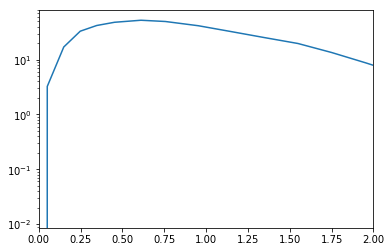

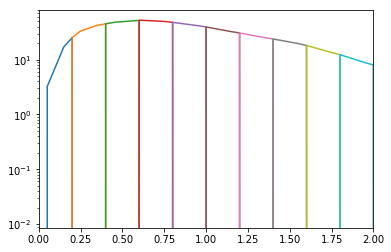

In [9]:
reload(cp)
zmin=0;zmax=2
cp.plotDNDZM(binned=False,zmin=zmin,zmax=zmax)
cp.plotDNDZM(binned=True,zmin=zmin,zmax=zmax)

In [10]:
# from getKLimited (below), modified for bin centers and chiOfZ2:
# create lmax function via the Limber approximation
myLmax = lambda kmax: np.floor(kmax*chiOfZ2(binCenters)-0.5).astype(int)
lmaxByBin1 = myLmax(0.1)
lmaxByBin2 = myLmax(0.2)

print 'lmaxByBin1: ',lmaxByBin1
print 'lmaxByBin2: ',lmaxByBin2

lmaxByBin1:  [ 42 123 194 257 314 363 408 447 483 516 552 591 630 674 715 820]
lmaxByBin2:  [  86  246  389  516  628  728  816  896  967 1032 1105 1182 1261 1348
 1431 1641]


In [11]:
# above 30 in lowest bin in both cases.  Great.

# Break apart covar and dClVecs as observables drop out

In [12]:
# set the kmax values used throughout

#kmax1 = 0.05  # don't go below this or bin 2 will have less than 50 ells and crash program
#kmax2 = 0.075

#kmax1 = 0.1
#kmax2 = 0.2

#kmax1 = 1.0
#kmax2 = 2.0  # no need to go above this since it is high enough to only kill bin1

# write them in terms of parameter h
hubble = Fobj2.H0/100
print 'h = ',hubble

kmax2 = 0.3*hubble
kmax1 = kmax2*0.5
print 'kmax1 = ',kmax1
print 'kmaz2 = ',kmax2

h =  0.674924737938


In [14]:
# some helper functions for getKlimited, getKZlimited

# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)

# define the covar cutting function
def covarCut(covar,dClVecs,preMask,cutNum,verbose=True):
    """
    Purpose:
        produce covar and dClVecs with fewer observables
    Inputs:
        covar,dClVecs: like in Fobj
        preMask: this is a 1d array of binNumbers, 
          indicating which is the lowest bin number used for each row, col of covar 
          and each dClVec
        cutNum: a number contained in preMask indicating which rows, cols of covar, dClVecs to cut
    Returns:
        cut versions of covar,dClVecs,preMask
    """
    #toCut = np.flip(np.where(preMask[0]==cutNum),1)
    toCut = np.flip(np.where(preMask==cutNum),1) # removed 2nd dim of preMask since not needed
    if verbose:
        print 'to cut: ',toCut
    for cut in toCut:
        covar = fixParam(covar,cut)
        #preMask = fixParam(preMask,cut)
        preMask = np.delete(preMask,cut,0)
        dClVecs = np.delete(dClVecs,cut,0)
    if verbose:
        print 'covar.shape: ',covar.shape,', dClVecs.shape: ',dClVecs.shape
        print 'premask: ',preMask
    return covar,dClVecs,preMask


# Define function for creating blocks for making Fij

In [25]:
# Define function for creating blocks for making Fij
def getKlimited(binEdges,chiOfZ,Fobj,kmax=0.1,kgLmax=2000,centers=True,galaxiesOnly=False):
    """
    Purpose:
        Chop up Fobj.covar and Fobj.dClVecs into blocks that correspond to having ell values
          below ell(k_max,low_z_bin_edge) in Limber approximation
    Inputs:
        binEdges: an array of redshifts indicating the edges of the redshift bins
        chiOfZ: a distance-redshift relation function chi(z)
        Fobj: FisherMatrix object
        kmax: set the limit that controls the lmax of each redshift bin via Limber appx
          default: 0.1
        kgLmax: ell_max value for k,g
          default: 2000
        centers: set to True to indicate that the values in binEdges are actually bin centers
          default: True
        galaxiesOnly: set to True to cut out the kk, kg parts and return gg only
          default: False
    Uses:
        fixParam: defined above
        covarCut: defined above
    Returns:
        covarBins,dClVecsBins: lists of covar and dClVecs arrays to be used for making Fisher matrix
        lmaxByBin: the ell value for each ell-block edge 
          There will be nBins+2 if centers==True, else nBins+1
        preMaskBins: list of one dimensional masks containing minimum bin numbers for covarBins,dClVecsBins
    """
    # create lmax function via the Limber approximation
    myLmax = lambda kmax: np.floor(kmax*chiOfZ(binEdges)-0.5).astype(int)
    lmaxByBin = myLmax(kmax) # gives array of lmax at lower bin edges (or centers)
    # the -1 is from the -0.5 in the Limber approximation put into the floor function

    # modify this for use in looping below
    lmin = Fobj.lmin
    if centers: # lmaxByBin elements are at bin centers; need to add endpoints for blocks
        lmaxByBin = np.append(Fobj2.lmin,np.append(lmaxByBin,kgLmax))
    else: # lmaxByBin elements are at bin edges, use these for endpoints for blocks
        lmaxByBin[0] = Fobj.lmin
        if lmaxByBin[-1] < kgLmax: 
            lmaxByBin[-1] = kgLmax  # this extends the last bin out to lmax, and this bin is kappa-only
            # >= kgLmax case taken care of below
    print 'kmax = ',kmax,': lmax = ',lmaxByBin
    
    # get codes describing observables
    nBins = Fobj.nBins
    nMaps = Fobj.nBins+1
    print 'obs names: ',Fobj.obsNames
    #print Fobj.obsList
    map1List = np.floor(Fobj.obsList/nMaps)
    map2List = Fobj.obsList%nMaps
    print 'map i numbers: ',map1List
    print 'map j numbers: ',map2List

    print 'invCov shape: ',Fobj.invCov.shape, 'number of observables: ',Fobj.obsList.shape[0]
    print 'lmin, lmax for k,g summation: ',lmin,kgLmax

    # create mask for covariance matrix to be applied to implement lmax
    mSize = Fobj.obsList.__len__()
    preMask = np.zeros((mSize,mSize)) # contains lowest bin number (>0) of 4 used in covar
    print 'preMask shape: ',preMask.shape
    for i in range(mSize):
        for j in range(i,mSize):
            myMaps = np.array([map1List[i],map1List[j],map2List[i],map2List[j]])        
            if i>0 or j>0:
                preMask[i,j] = np.min(myMaps[np.where(myMaps>0)])
                preMask[j,i] = preMask[i,j]
            else:
                preMask[0,0] = 0
            #print i,j,myMaps, myMaps[np.where(myMaps>0)], preMask[i,j]
    preMask = preMask.astype(int)
    print preMask#[0]
    
    covar=Fobj.covar
    dClVecs=Fobj.dClVecs
    preMaskLine = preMask[0] # modified to use just the first line
    
    verbose = True
    if galaxiesOnly:
        # kk and kg is at the beginning of each
        # cut all kg now, ignore kk at the end
        for cutNum in range(nBins):
            #covar,dClVecs,preMaskLine = covarCut(covar,dClVecs,preMaskLine,1,verbose=verbose)
            covar = fixParam(covar,1)
            preMaskLine = np.delete(preMaskLine,1,0)
            dClVecs = np.delete(dClVecs,1,0)
        #covar = covar[nBins+1:,nBins+1:]
        #dClVecs = dClVecs[nBins+1:]
        #preMask = preMask[nBins+1:,nBins+1:]
        print 'galaxiesOnly = True: kappa-g has been removed.'
    print 'preMaskLine: ',preMaskLine
    print 'covar shape: ',covar.shape
    print 'dClVecs shape: ',dClVecs.shape
        
    # cut out all covar,dClVecs,preMask elements with row/col of 1s below lmaxByBin[0] = -1 : so all the way to lmin.

    # prepare containers for the results
    covarBins = []
    dClVecsBins = []
    preMaskBins = []

    # iterate as bins are removed
    myEllMin = lmaxByBin[0]
    myEllMax = lmaxByBin[1]
    lastBlock = False # for stopping iteration if myEllMax is below kgLmax
    if centers:
        nBlocks = nBins+1
    else: 
        nBlocks = nBins
        
    for blockNum in range(nBlocks): 
        print '\nstarting blockNum {0} of {1}...'.format(blockNum+1,nBlocks)
        
        if not centers: # cut bins not needed for this block
            covar,dClVecs,preMaskLine = covarCut(covar,dClVecs,preMaskLine,blockNum+1,verbose=verbose)

        if lmaxByBin[blockNum+1] < kgLmax:
            myEllMin = lmaxByBin[blockNum]
            myEllMax = lmaxByBin[blockNum+1]
        else:
            if lmaxByBin[blockNum] < kgLmax:
                # prob. don't need this if here since only one endpoint will pass kgLmax then end the for loop
                myEllMin = lmaxByBin[blockNum]
            myEllMax = kgLmax
            lastBlock = True
            
        # create block-out
        if galaxiesOnly:
            covarBins.append( covar[1:,1:,myEllMin-lmin:myEllMax-lmin] )
            dClVecsBins.append( dClVecs[1:,:,myEllMin-lmin:myEllMax-lmin] )
            preMaskBins.append( preMaskLine[1:].copy() )
        else:
            covarBins.append( covar[:,:,myEllMin-lmin:myEllMax-lmin] )
            dClVecsBins.append( dClVecs[:,:,myEllMin-lmin:myEllMax-lmin] )
            preMaskBins.append( preMaskLine.copy() )
        if galaxiesOnly and blockNum == nBlocks-2:
            print 'omitting kappa block.'
            lastBlock = True
        
        if centers and blockNum != nBins: # this cut has to be done after block-out
            covar,dClVecs,preMaskLine = covarCut(covar,dClVecs,preMaskLine,blockNum+1,verbose=verbose)
            
        print 'blockNum = ',blockNum,', covarBins.shape = ',covarBins[blockNum].shape,', dClVecsBins.shape = ',dClVecsBins[blockNum].shape
        if verbose:
            print 'covariance shape: ',covarBins[blockNum].shape
            print 'derivative array shape: ',dClVecsBins[blockNum].shape
            print r'bin $\ell_{{min}} = {0}$, bin $\ell_{{max}} = {1}$'.format(lmaxByBin[blockNum],lmaxByBin[blockNum+1]-1)
        if lastBlock:
            break # should break the for blockNum loop
            
    print 'done'  
    return covarBins,dClVecsBins,lmaxByBin,preMaskBins

# test it
# setting doTest True with kmax_t = 5, centers=False, creates a bin1-free case to compare against
#doTest = True
doTest = False
if doTest:
    #kmax_t = kmax2
    kmax_t = 5
    print 'starting optimistic P(k), kmax = {0}...'.format(kmax_t)
    covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax_t,
                                                                              centers=False)
    #covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax_t,
    #                                                                          centers=True)
    covarBins2_01g,dClVecsBins2_01g,lmaxByBin2_01g,preMaskBins2_01g = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax_t,
                                                                              centers=False,galaxiesOnly=True)
    #covarBins2_01g,dClVecsBins2_01g,lmaxByBin2_01g,preMaskBins2_01g = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax_t,
    #                                                                          centers=True,galaxiesOnly=True)


starting nonlinear P(k), kmax = 0.202477421382...
kmax =  0.202477421382 : lmax =  [   2  170  324  460  581  688  783  868  944 1013 1075 1159 1232 1318
 1408 1486 2000]
obs names:  ['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9', 'g1,g10', 'g1,g11', 'g1,g12', 'g1,g13', 'g1,g14', 'g1,g15', 'g1,g16', 'g2,g2', 'g2,g3', 'g2,g4', 'g2,g5', 'g2,g6', 'g2,g7', 'g2,g8', 'g2,g9', 'g2,g10', 'g2,g11', 'g2,g12', 'g2,g13', 'g2,g14', 'g2,g15', 'g2,g16', 'g3,g3', 'g3,g4', 'g3,g5', 'g3,g6', 'g3,g7', 'g3,g8', 'g3,g9', 'g3,g10', 'g3,g11', 'g3,g12', 'g3,g13', 'g3,g14', 'g3,g15', 'g3,g16', 'g4,g4', 'g4,g5', 'g4,g6', 'g4,g7', 'g4,g8', 'g4,g9', 'g4,g10', 'g4,g11', 'g4,g12', 'g4,g13', 'g4,g14', 'g4,g15', 'g4,g16', 'g5,g5', 'g5,g6', 'g5,g7', 'g5,g8', 'g5,g9', 'g5,g10', 'g5,g11', 'g5,g12', 'g5,g13', 'g5,g14', 'g5,g15', 'g5,g16', 'g6,g6', 

covar.shape:  (45, 45, 2999) , dClVecs.shape:  (45, 25, 2999)
premask:  [ 0  9 10 11 12 13 14 15 16  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10
 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  7 , covarBins.shape =  (45, 45, 76) , dClVecsBins.shape =  (45, 25, 76)
covariance shape:  (45, 45, 76)
derivative array shape:  (45, 25, 76)
bin $\ell_{min} = 868$, bin $\ell_{max} = 943$

starting blockNum 9 of 16...
to cut:  [[16 15 14 13 12 11 10  9  1]]
covar.shape:  (36, 36, 2999) , dClVecs.shape:  (36, 25, 2999)
premask:  [ 0 10 11 12 13 14 15 16 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12
 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  8 , covarBins.shape =  (36, 36, 69) , dClVecsBins.shape =  (36, 25, 69)
covariance shape:  (36, 36, 69)
derivative array shape:  (36, 25, 69)
bin $\ell_{min} = 944$, bin $\ell_{max} = 1012$

starting blockNum 10 of 16...
to cut:  [[14 13 12 11 10  9  8  1]]
covar.shape:  (28, 28, 2999) , dClVecs.shape:  (28, 25, 2999)
prem

covar.shape:  (92, 92, 2999) , dClVecs.shape:  (92, 25, 2999)
premask:  [ 0  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8
  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11
 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  2 , covarBins.shape =  (91, 91, 136) , dClVecsBins.shape =  (91, 25, 136)
covariance shape:  (91, 91, 136)
derivative array shape:  (91, 25, 136)
bin $\ell_{min} = 324$, bin $\ell_{max} = 459$

starting blockNum 4 of 16...
to cut:  [[13 12 11 10  9  8  7  6  5  4  3  2  1]]
covar.shape:  (79, 79, 2999) , dClVecs.shape:  (79, 25, 2999)
premask:  [ 0  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6
  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13
 13 14 14 14 15 15 16]
blockNum =  3 , covarBins.shape =  (78, 78, 12

In [26]:
if doTest:
    print 'not galaxiesOnly:'
    print dClVecsBins2_01.__len__()
    #print invCovBins2_01.__len__()
    print covarBins2_01.__len__()

    for blockNum in range(dClVecsBins2_01.__len__()):
        print 'blockNum ',blockNum
        print 'dClVecs shape: ',dClVecsBins2_01[blockNum].shape
        #print 'invCovar shape: ',invCovBins2_01[blockNum].shape
        print 'covar shape: ',covarBins2_01[blockNum].shape
        print 'lmaxByBin: ',lmaxByBin2_01[blockNum]
        print 'preMaskBins: ',preMaskBins2_01[blockNum]
        
    print '\ngalaxiesOnly:'
    print dClVecsBins2_01g.__len__()
    #print invCovBins2_01g.__len__()
    print covarBins2_01g.__len__()

    for blockNum in range(dClVecsBins2_01g.__len__()):
        print 'blockNum ',blockNum
        print 'dClVecs shape: ',dClVecsBins2_01g[blockNum].shape
        #print 'invCovar shape: ',invCovBins2_01g[blockNum].shape
        print 'covar shape: ',covarBins2_01g[blockNum].shape
        print 'lmaxByBin: ',lmaxByBin2_01g[blockNum]
        print 'preMaskBins: ',preMaskBins2_01g[blockNum]


not galaxiesOnly:
16
16
blockNum  0
dClVecs shape:  (136, 25, 168)
covar shape:  (136, 136, 168)
lmaxByBin:  2
preMaskBins:  [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4
  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8
  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11
 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum  1
dClVecs shape:  (120, 25, 154)
covar shape:  (120, 120, 154)
lmaxByBin:  170
preMaskBins:  [ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 1

In [ ]:
# testing
if doTest:
    invCovOneC = np.transpose(np.linalg.inv(np.transpose(covarBins2_01[0])))
    dClVecs50C = dClVecsBins2_01[0][:,:,myLmin-lmin:myLmax-lmin]
    invCov50C = invCovOneC[:,:,myLmin-lmin:myLmax-lmin]
    Fij50C = makeFij(dClVecs50C,invCov50C,Fobj2.nParams)
    Fij50C = fixParam(Fij50C,9)
    sigmas50C = getSigmas(Fij50C)
    
    # galaxies only case
    invCovOneCg = np.transpose(np.linalg.inv(np.transpose(covarBins2_01g[0])))
    dClVecs50Cg = dClVecsBins2_01g[0][:,:,myLmin-lmin:myLmax-lmin]
    invCov50Cg = invCovOneCg[:,:,myLmin-lmin:myLmax-lmin]
    Fij50Cg = makeFij(dClVecs50Cg,invCov50Cg,Fobj2.nParams)
    Fij50Cg = fixParam(Fij50Cg,9)
    sigmas50Cg = getSigmas(Fij50Cg)
    
    print 'done.'

In [28]:
#centers = True
centers = False
if centers:
    print 'starting optimistic P(k), kmax = {0}...'.format(kmax1)
    covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax1,
                                                                              centers=centers)
    print 'starting optimistic P(k), kmax = {0}...'.format(kmax2)
    covarBins2_02,dClVecsBins2_02,lmaxByBin2_02,preMaskBins2_02 = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax2,
                                                                              centers=centers)

    print 'starting gold P(k), kmax = {0}...'.format(kmax1)
    covarBins4_01,dClVecsBins4_01,lmaxByBin4_01,preMaskBins4_01 = getKlimited(binCenters,chiOfZ4,Fobj4,kmax=kmax1,
                                                                              centers=centers)
    print 'starting gold P(k), kmax = {0}...'.format(kmax2)
    covarBins4_02,dClVecsBins4_02,lmaxByBin4_02,preMaskBins4_02 = getKlimited(binCenters,chiOfZ4,Fobj4,kmax=kmax2,
                                                                              centers=centers)
else:
    print 'starting optimistic P(k), kmax = {0}...'.format(kmax1)
    covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax1,
                                                                              centers=centers)
    print 'starting optimistic P(k), kmax = {0}...'.format(kmax2)
    covarBins2_02,dClVecsBins2_02,lmaxByBin2_02,preMaskBins2_02 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax2,
                                                                              centers=centers)

    print 'starting gold P(k), kmax = {0}...'.format(kmax1)
    covarBins4_01,dClVecsBins4_01,lmaxByBin4_01,preMaskBins4_01 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax1,
                                                                              centers=centers)
    print 'starting gold P(k), kmax = {0}...'.format(kmax2)
    covarBins4_02,dClVecsBins4_02,lmaxByBin4_02,preMaskBins4_02 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax2,
                                                                              centers=centers)
    
print 'done with all 4 cases.'

starting nonlinear P(k), kmax = 0.101238710691...
kmax =  0.101238710691 : lmax =  [   2   85  161  230  290  343  391  433  472  506  537  579  616  658
  704  742 2000]
obs names:  ['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9', 'g1,g10', 'g1,g11', 'g1,g12', 'g1,g13', 'g1,g14', 'g1,g15', 'g1,g16', 'g2,g2', 'g2,g3', 'g2,g4', 'g2,g5', 'g2,g6', 'g2,g7', 'g2,g8', 'g2,g9', 'g2,g10', 'g2,g11', 'g2,g12', 'g2,g13', 'g2,g14', 'g2,g15', 'g2,g16', 'g3,g3', 'g3,g4', 'g3,g5', 'g3,g6', 'g3,g7', 'g3,g8', 'g3,g9', 'g3,g10', 'g3,g11', 'g3,g12', 'g3,g13', 'g3,g14', 'g3,g15', 'g3,g16', 'g4,g4', 'g4,g5', 'g4,g6', 'g4,g7', 'g4,g8', 'g4,g9', 'g4,g10', 'g4,g11', 'g4,g12', 'g4,g13', 'g4,g14', 'g4,g15', 'g4,g16', 'g5,g5', 'g5,g6', 'g5,g7', 'g5,g8', 'g5,g9', 'g5,g10', 'g5,g11', 'g5,g12', 'g5,g13', 'g5,g14', 'g5,g15', 'g5,g16', 'g6,g6', 

covar.shape:  (45, 45, 2999) , dClVecs.shape:  (45, 25, 2999)
premask:  [ 0  9 10 11 12 13 14 15 16  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10
 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  7 , covarBins.shape =  (45, 45, 39) , dClVecsBins.shape =  (45, 25, 39)
covariance shape:  (45, 45, 39)
derivative array shape:  (45, 25, 39)
bin $\ell_{min} = 433$, bin $\ell_{max} = 471$

starting blockNum 9 of 16...
to cut:  [[16 15 14 13 12 11 10  9  1]]
covar.shape:  (36, 36, 2999) , dClVecs.shape:  (36, 25, 2999)
premask:  [ 0 10 11 12 13 14 15 16 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12
 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  8 , covarBins.shape =  (36, 36, 34) , dClVecsBins.shape =  (36, 25, 34)
covariance shape:  (36, 36, 34)
derivative array shape:  (36, 25, 34)
bin $\ell_{min} = 472$, bin $\ell_{max} = 505$

starting blockNum 10 of 16...
to cut:  [[14 13 12 11 10  9  8  1]]
covar.shape:  (28, 28, 2999) , dClVecs.shape:  (28, 25, 2999)
prema

covar.shape:  (105, 105, 2999) , dClVecs.shape:  (105, 25, 2999)
premask:  [ 0  4  5  6  7  8  9 10 11 12 13 14 15 16  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13 14 14 14 15 15 16]
blockNum =  2 , covarBins.shape =  (105, 105, 136) , dClVecsBins.shape =  (105, 25, 136)
covariance shape:  (105, 105, 136)
derivative array shape:  (105, 25, 136)
bin $\ell_{min} = 324$, bin $\ell_{max} = 459$

starting blockNum 4 of 16...
to cut:  [[26 25 24 23 22 21 20 19 18 17 16 15 14  1]]
covar.shape:  (91, 91, 2999) , dClVecs.shape:  (91, 25, 2999)
premask:  [ 0  5  6  7  8  9 10 11 12 13 14 15 16  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 1

covar.shape:  (21, 21, 2999) , dClVecs.shape:  (21, 15, 2999)
premask:  [0 2 3 4 5 6 2 2 2 2 2 3 3 3 3 4 4 4 5 5 6]
blockNum =  0 , covarBins.shape =  (21, 21, 83) , dClVecsBins.shape =  (21, 15, 83)
covariance shape:  (21, 21, 83)
derivative array shape:  (21, 15, 83)
bin $\ell_{min} = 2$, bin $\ell_{max} = 84$

starting blockNum 2 of 6...
to cut:  [[10  9  8  7  6  1]]
covar.shape:  (15, 15, 2999) , dClVecs.shape:  (15, 15, 2999)
premask:  [0 3 4 5 6 3 3 3 3 4 4 4 5 5 6]
blockNum =  1 , covarBins.shape =  (15, 15, 76) , dClVecsBins.shape =  (15, 15, 76)
covariance shape:  (15, 15, 76)
derivative array shape:  (15, 15, 76)
bin $\ell_{min} = 85$, bin $\ell_{max} = 160$

starting blockNum 3 of 6...
to cut:  [[8 7 6 5 1]]
covar.shape:  (10, 10, 2999) , dClVecs.shape:  (10, 15, 2999)
premask:  [0 4 5 6 4 4 4 5 5 6]
blockNum =  2 , covarBins.shape =  (10, 10, 69) , dClVecsBins.shape =  (10, 15, 69)
covariance shape:  (10, 10, 69)
derivative array shape:  (10, 15, 69)
bin $\ell_{min} = 161$

In [29]:
# same for galaxies-only case:
if centers:
    print 'starting optimistic P(k), kmax = {0}...'.format(kmax1)
    covarBins2_01g,dClVecsBins2_01g,lmaxByBin2_01g,preMaskBins2_01g = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax1,
                                                                              centers=centers,galaxiesOnly=True)
    print 'starting optimistic P(k), kmax = {0}...'.format(kmax2)
    covarBins2_02g,dClVecsBins2_02g,lmaxByBin2_02g,preMaskBins2_02g = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax2,
                                                                              centers=centers,galaxiesOnly=True)

    print 'starting gold P(k), kmax = {0}...'.format(kmax1)
    covarBins4_01g,dClVecsBins4_01g,lmaxByBin4_01g,preMaskBins4_01g = getKlimited(binCenters,chiOfZ4,Fobj4,kmax=kmax1,
                                                                              centers=centers,galaxiesOnly=True)
    print 'starting gold P(k), kmax = {0}...'.format(kmax2)
    covarBins4_02g,dClVecsBins4_02g,lmaxByBin4_02g,preMaskBins4_02g = getKlimited(binCenters,chiOfZ4,Fobj4,kmax=kmax2,
                                                                              centers=centers,galaxiesOnly=True)
else:
    print 'starting optimistic P(k), kmax = {0}...'.format(kmax1)
    covarBins2_01g,dClVecsBins2_01g,lmaxByBin2_01g,preMaskBins2_01g = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax1,
                                                                              centers=centers,galaxiesOnly=True)
    print 'starting optimistic P(k), kmax = {0}...'.format(kmax2)
    covarBins2_02g,dClVecsBins2_02g,lmaxByBin2_02g,preMaskBins2_02g = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax2,
                                                                              centers=centers,galaxiesOnly=True)

    print 'starting gold P(k), kmax = {0}...'.format(kmax1)
    covarBins4_01g,dClVecsBins4_01g,lmaxByBin4_01g,preMaskBins4_01g = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax1,
                                                                              centers=centers,galaxiesOnly=True)
    print 'starting gold P(k), kmax = {0}...'.format(kmax2)
    covarBins4_02g,dClVecsBins4_02g,lmaxByBin4_02g,preMaskBins4_02g = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax2,
                                                                              centers=centers,galaxiesOnly=True)
    
print 'done with all 4 cases.'

starting nonlinear P(k), kmax = 0.101238710691...
kmax =  0.101238710691 : lmax =  [   2   85  161  230  290  343  391  433  472  506  537  579  616  658
  704  742 2000]
obs names:  ['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9', 'g1,g10', 'g1,g11', 'g1,g12', 'g1,g13', 'g1,g14', 'g1,g15', 'g1,g16', 'g2,g2', 'g2,g3', 'g2,g4', 'g2,g5', 'g2,g6', 'g2,g7', 'g2,g8', 'g2,g9', 'g2,g10', 'g2,g11', 'g2,g12', 'g2,g13', 'g2,g14', 'g2,g15', 'g2,g16', 'g3,g3', 'g3,g4', 'g3,g5', 'g3,g6', 'g3,g7', 'g3,g8', 'g3,g9', 'g3,g10', 'g3,g11', 'g3,g12', 'g3,g13', 'g3,g14', 'g3,g15', 'g3,g16', 'g4,g4', 'g4,g5', 'g4,g6', 'g4,g7', 'g4,g8', 'g4,g9', 'g4,g10', 'g4,g11', 'g4,g12', 'g4,g13', 'g4,g14', 'g4,g15', 'g4,g16', 'g5,g5', 'g5,g6', 'g5,g7', 'g5,g8', 'g5,g9', 'g5,g10', 'g5,g11', 'g5,g12', 'g5,g13', 'g5,g14', 'g5,g15', 'g5,g16', 'g6,g6', 

covar.shape:  (29, 29, 2999) , dClVecs.shape:  (29, 25, 2999)
premask:  [ 0 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14
 14 14 15 15 16]
blockNum =  8 , covarBins.shape =  (28, 28, 34) , dClVecsBins.shape =  (28, 25, 34)
covariance shape:  (28, 28, 34)
derivative array shape:  (28, 25, 34)
bin $\ell_{min} = 472$, bin $\ell_{max} = 505$

starting blockNum 10 of 16...
to cut:  [[7 6 5 4 3 2 1]]
covar.shape:  (22, 22, 2999) , dClVecs.shape:  (22, 25, 2999)
premask:  [ 0 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  9 , covarBins.shape =  (21, 21, 31) , dClVecsBins.shape =  (21, 25, 31)
covariance shape:  (21, 21, 31)
derivative array shape:  (21, 25, 31)
bin $\ell_{min} = 506$, bin $\ell_{max} = 536$

starting blockNum 11 of 16...
to cut:  [[6 5 4 3 2 1]]
covar.shape:  (16, 16, 2999) , dClVecs.shape:  (16, 25, 2999)
premask:  [ 0 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  10 , covarBins.shape =  (15, 15, 42) , dClVecsBi

covar.shape:  (79, 79, 2999) , dClVecs.shape:  (79, 25, 2999)
premask:  [ 0  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6
  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13
 13 14 14 14 15 15 16]
blockNum =  3 , covarBins.shape =  (78, 78, 121) , dClVecsBins.shape =  (78, 25, 121)
covariance shape:  (78, 78, 121)
derivative array shape:  (78, 25, 121)
bin $\ell_{min} = 460$, bin $\ell_{max} = 580$

starting blockNum 5 of 16...
to cut:  [[12 11 10  9  8  7  6  5  4  3  2  1]]
covar.shape:  (67, 67, 2999) , dClVecs.shape:  (67, 25, 2999)
premask:  [ 0  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  4 , covarBins.shape =  (66, 66, 107) , dClVecsBins.shape =  (66, 25, 107)
covariance shape:  (66, 66, 107)
deriva

galaxiesOnly = True: kappa-g has been removed.
preMaskLine:  [0 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3 4 4 4 5 5 6]
covar shape:  (22, 22, 2999)
dClVecs shape:  (22, 15, 2999)

starting blockNum 1 of 6...
to cut:  [[6 5 4 3 2 1]]
covar.shape:  (16, 16, 2999) , dClVecs.shape:  (16, 15, 2999)
premask:  [0 2 2 2 2 2 3 3 3 3 4 4 4 5 5 6]
blockNum =  0 , covarBins.shape =  (15, 15, 168) , dClVecsBins.shape =  (15, 15, 168)
covariance shape:  (15, 15, 168)
derivative array shape:  (15, 15, 168)
bin $\ell_{min} = 2$, bin $\ell_{max} = 169$

starting blockNum 2 of 6...
to cut:  [[5 4 3 2 1]]
covar.shape:  (11, 11, 2999) , dClVecs.shape:  (11, 15, 2999)
premask:  [0 3 3 3 3 4 4 4 5 5 6]
blockNum =  1 , covarBins.shape =  (10, 10, 154) , dClVecsBins.shape =  (10, 15, 154)
covariance shape:  (10, 10, 154)
derivative array shape:  (10, 15, 154)
bin $\ell_{min} = 170$, bin $\ell_{max} = 323$

starting blockNum 3 of 6...
to cut:  [[4 3 2 1]]
covar.shape:  (7, 7, 2999) , dClVecs.shape:  (7, 15, 2999)
premask:

# Get inverse covariance matrices

In [30]:
# get inverse covariance matrices
def getInvArray(covarBins):
    invCovBins = []
    nBlocks = covarBins.__len__()
    for binNum in range(nBlocks):
        invCovBins.append( np.transpose(np.linalg.inv(np.transpose(covarBins[binNum]))) )
    return invCovBins

invCovBins2_01 = getInvArray(covarBins2_01)
invCovBins2_02 = getInvArray(covarBins2_02)
invCovBins4_01 = getInvArray(covarBins4_01)
invCovBins4_02 = getInvArray(covarBins4_02)
print 'done'

done


In [31]:
# galaxies only cases
invCovBins2_01g = getInvArray(covarBins2_01g)
invCovBins2_02g = getInvArray(covarBins2_02g)
invCovBins4_01g = getInvArray(covarBins4_01g)
invCovBins4_02g = getInvArray(covarBins4_02g)
print 'done'

done


In [32]:
# cut to myLmin in first bin
#myLmin = 30
minEllInd = myLmin-Fobj2.lmin

dClVecsBins2_01[0] = dClVecsBins2_01[0][:,:,minEllInd:]
covarBins2_01[0]  =  covarBins2_01[0][:,:,minEllInd:]
invCovBins2_01[0]  =  invCovBins2_01[0][:,:,minEllInd:]
dClVecsBins2_02[0] = dClVecsBins2_02[0][:,:,minEllInd:]
covarBins2_02[0]  =  covarBins2_02[0][:,:,minEllInd:]
invCovBins2_02[0]  =  invCovBins2_02[0][:,:,minEllInd:]

dClVecsBins4_01[0] = dClVecsBins4_01[0][:,:,minEllInd:]
covarBins4_01[0]  =  covarBins4_01[0][:,:,minEllInd:]
invCovBins4_01[0]  =  invCovBins4_01[0][:,:,minEllInd:]
dClVecsBins4_02[0] = dClVecsBins4_02[0][:,:,minEllInd:]
covarBins4_02[0]  =  covarBins4_02[0][:,:,minEllInd:]
invCovBins4_02[0]  =  invCovBins4_02[0][:,:,minEllInd:]

# galaxies only cases

dClVecsBins2_01g[0] = dClVecsBins2_01g[0][:,:,minEllInd:]
covarBins2_01g[0]  =  covarBins2_01g[0][:,:,minEllInd:]
invCovBins2_01g[0]  =  invCovBins2_01g[0][:,:,minEllInd:]
dClVecsBins2_02g[0] = dClVecsBins2_02g[0][:,:,minEllInd:]
covarBins2_02g[0]  =  covarBins2_02g[0][:,:,minEllInd:]
invCovBins2_02g[0]  =  invCovBins2_02g[0][:,:,minEllInd:]

dClVecsBins4_01g[0] = dClVecsBins4_01g[0][:,:,minEllInd:]
covarBins4_01g[0]  =  covarBins4_01g[0][:,:,minEllInd:]
invCovBins4_01g[0]  =  invCovBins4_01g[0][:,:,minEllInd:]
dClVecsBins4_02g[0] = dClVecsBins4_02g[0][:,:,minEllInd:]
covarBins4_02g[0]  =  covarBins4_02g[0][:,:,minEllInd:]
invCovBins4_02g[0]  =  invCovBins4_02g[0][:,:,minEllInd:]

In [37]:
# look at shapes of these things

print '\n2_01:'
print dClVecsBins2_01.__len__()
print invCovBins2_01.__len__()
print covarBins2_01.__len__()

for blockNum in range(dClVecsBins2_01.__len__()):
    print 'blockNum ',blockNum
    print dClVecsBins2_01[blockNum].shape
    print invCovBins2_01[blockNum].shape
    print covarBins2_01[blockNum].shape

print '\n4_01:'
print dClVecsBins4_01.__len__()
print invCovBins4_01.__len__()
print covarBins4_01.__len__()

for blockNum in range(dClVecsBins4_01.__len__()):
    print 'blockNum ',blockNum
    print dClVecsBins4_01[blockNum].shape
    print invCovBins4_01[blockNum].shape
    print covarBins4_01[blockNum].shape

print '\n2_01g:'
print dClVecsBins2_01g.__len__()
print invCovBins2_01g.__len__()
print covarBins2_01g.__len__()

for blockNum in range(dClVecsBins2_01g.__len__()):
    print 'blockNum ',blockNum
    print dClVecsBins2_01g[blockNum].shape
    print invCovBins2_01g[blockNum].shape
    print covarBins2_01g[blockNum].shape
    
print '\n4_01g:'
print dClVecsBins4_01g.__len__()
print invCovBins4_01g.__len__()
print covarBins4_01g.__len__()

for blockNum in range(dClVecsBins4_01g.__len__()):
    print 'blockNum ',blockNum
    print dClVecsBins4_01g[blockNum].shape
    print invCovBins4_01g[blockNum].shape
    print covarBins4_01g[blockNum].shape

16
16
16
blockNum  0
(136, 25, 55)
(136, 136, 55)
(136, 136, 55)
blockNum  1
(120, 25, 76)
(120, 120, 76)
(120, 120, 76)
blockNum  2
(105, 25, 69)
(105, 105, 69)
(105, 105, 69)
blockNum  3
(91, 25, 60)
(91, 91, 60)
(91, 91, 60)
blockNum  4
(78, 25, 53)
(78, 78, 53)
(78, 78, 53)
blockNum  5
(66, 25, 48)
(66, 66, 48)
(66, 66, 48)
blockNum  6
(55, 25, 42)
(55, 55, 42)
(55, 55, 42)
blockNum  7
(45, 25, 39)
(45, 45, 39)
(45, 45, 39)
blockNum  8
(36, 25, 34)
(36, 36, 34)
(36, 36, 34)
blockNum  9
(28, 25, 31)
(28, 28, 31)
(28, 28, 31)
blockNum  10
(21, 25, 42)
(21, 21, 42)
(21, 21, 42)
blockNum  11
(15, 25, 37)
(15, 15, 37)
(15, 15, 37)
blockNum  12
(10, 25, 42)
(10, 10, 42)
(10, 10, 42)
blockNum  13
(6, 25, 46)
(6, 6, 46)
(6, 6, 46)
blockNum  14
(3, 25, 38)
(3, 3, 38)
(3, 3, 38)
blockNum  15
(1, 25, 1258)
(1, 1, 1258)
(1, 1, 1258)
15
15
15
blockNum  0
(120, 25, 55)
(120, 120, 55)
(120, 120, 55)
blockNum  1
(105, 25, 76)
(105, 105, 76)
(105, 105, 76)
blockNum  2
(91, 25, 69)
(91, 91, 69)
(91,

# Assemble the $F_{ij}$ matrices and add them up

In [34]:
def makeFij(dClVecs,invCov,nParams):
    """
    This may replace the previous makeFisher function... blah blah blah.
    Inputs:
        all must have same ell range.  All ell values will be summed over.
    """
    Fij = np.zeros((nParams,nParams)) # indices match those in paramList
    for i in range(nParams):
      dClVec_i = dClVecs[:,i,:] # shape (nCls,nElls)
      for j in range(nParams):
        dClVec_j = dClVecs[:,j,:] # shape (nCls,nElls)
        # here is the summation over ell:
        for ellInd in range(invCov.shape[2]):
          #print dClVec_i.shape,invCov.shape,dClVec_j.shape
          fij = np.dot(dClVec_i[:,ellInd],np.dot(invCov[:,:,ellInd],dClVec_j[:,ellInd]))
          Fij[i,j] += fij
    return Fij


In [36]:
# assemble the avengers
#def getFijSum(nParams,nBins,dClVecsBins,invCovBins,Fij_kk,paramList):
def getFijSum(nParams,nBins,dClVecsBins,invCovBins,paramList,centers=False):
    """
    Inputs:
    
    Returns:
    
    """
    Fij = np.zeros((nParams,nParams)) # indices match those in paramList
    nBlocks = dClVecsBins.__len__()
    nBlocks2 = invCovBins.__len__()
    print 'nBlocks: ',nBlocks,', nBlocks2: ',nBlocks2
    for binNum in range(nBlocks):
        #print binNum, dClVecsBins[binNum].size,dClVecsBins[binNum].shape,invCovBins[binNum].shape
        Fij += makeFij(dClVecsBins[binNum],invCovBins[binNum],nParams)

    # add the low-ell kappa-only part (high ell part was binNum = nBins-1)
    nCosParams = nParams-nBins
    #Fij[:nCosParams,:nCosParams] += Fij_kk
    
    if not centers:
        # cut out bin1 from Fij and paramList since it was never used
        Fij = fixParam(Fij,nCosParams)
        myParamList = np.delete(paramList,nCosParams,0)

    print myParamList
    #print Fij
    return Fij,myParamList


nBlocks:  16 , nBlocks2:  16
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']
nBlocks:  16 , nBlocks2:  16
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']
nBlocks:  6 , nBlocks2:  6
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'wa' 'w' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6']
nBlocks:  6 , nBlocks2:  6
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'wa' 'w' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6']
done.


In [ ]:
# kg cases

#Fij2_01,paramList2_01 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01,invCovBins2_01,Fij_kk2_01,Fobj2.paramList)
#Fij2_02,paramList2_02 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_02,invCovBins2_02,Fij_kk2_02,Fobj2.paramList)
#Fij4_01,paramList4_01 = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_01,invCovBins4_01,Fij_kk4_01,Fobj4.paramList)
#Fij4_02,paramList4_02 = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_02,invCovBins4_02,Fij_kk4_02,Fobj4.paramList)
Fij2_01,paramList2_01 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01,invCovBins2_01,Fobj2.paramList,
                                  centers=centers)
Fij2_02,paramList2_02 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_02,invCovBins2_02,Fobj2.paramList,
                                  centers=centers)
Fij4_01,paramList4_01 = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_01,invCovBins4_01,Fobj4.paramList,
                                  centers=centers)
Fij4_02,paramList4_02 = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_02,invCovBins4_02,Fobj4.paramList,
                                  centers=centers)
print 'done.'

In [38]:
# galaxies only cases
Fij2_01g,paramList2_01g = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01g,invCovBins2_01g,Fobj2.paramList,
                                  centers=centers)
Fij2_02g,paramList2_02g = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_02g,invCovBins2_02g,Fobj2.paramList,
                                  centers=centers)
Fij4_01g,paramList4_01g = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_01g,invCovBins4_01g,Fobj4.paramList,
                                  centers=centers)
Fij4_02g,paramList4_02g = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_02g,invCovBins4_02g,Fobj4.paramList,
                                  centers=centers)
print 'done.'

nBlocks:  15 , nBlocks2:  15
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']
nBlocks:  15 , nBlocks2:  15
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']
nBlocks:  5 , nBlocks2:  5
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'wa' 'w' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6']
nBlocks:  5 , nBlocks2:  5
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'wa' 'w' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6']
done.


In [39]:
# get k-unlimited Fij_kg.s
Fij2_00 = Fobj2.makeFisher(myLmin,TE=False)
Fij4_00 = Fobj4.makeFisher(myLmin,TE=False)
print 'done.'

done.


In [42]:
# compare general result to specialized one
sigmas2_01 = getSigmas(Fij2_01)
#sigmas4_01 = getSigmas(Fij4_01)

In [43]:
# if test case was done with high k_max, then this is a comparison against 'without bin1'
if doTest:
    print 'optimistic dn/dz'
    
    print 'without bin1 vs kmin 1, kappa+galaxies'
    t = PrettyTable(['Parameter','sigmas_no_bin1C','sigmas2_01','percent diff.'])
    for i,p in enumerate(paramList[:nCosParams]):
        Zi = sigmas50C[i]
        Bi = sigmas2_01[i]
        diff = (Bi-Zi)/Zi *100
        t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
    print t
    
    print 'without bin1 vs kmin 1, galaxies only'    
    t = PrettyTable(['Parameter','sigmas_no_bin1C','sigmas2_01','percent diff.'])
    for i,p in enumerate(paramList[:nCosParams]):
        Zi = sigmas50Cg[i]
        Bi = sigmas2_01g[i]
        diff = (Bi-Zi)/Zi *100
        t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
    print t


without bin1 vs kmin 1
+---------------+-----------------+------------+---------------+
|   Parameter   | sigmas_no_bin1C | sigmas2_01 | percent diff. |
+---------------+-----------------+------------+---------------+
|     ombh2     |      0.0159     |   0.0039   |     -75.4     |
|     omch2     |      0.0577     |   0.0135   |     -76.5     |
| cosmomc_theta |     0.000574    |  0.000123  |     -78.5     |
|       As      |     1.09e-09    |  2.55e-10  |     -76.5     |
|       ns      |       0.18      |   0.0418   |     -76.8     |
|      tau      |       78.2      |    28.6    |     -63.4     |
|      mnu      |      0.534      |   0.233    |     -56.3     |
|       w       |      0.618      |   0.362    |     -41.5     |
|       wa      |        1.7      |   0.967    |       -43     |
+---------------+-----------------+------------+---------------+


In [44]:
# bingo. kmin 1, which removes even more info than just bin 1, shows slightly higher uncertainty.

In [45]:
# add the kappa bit to the Fij50C part and check again
"""
Fij50C = makeFij(dClVecs50C,invCov50C,Fobj2.nParams)
Fij50C[:nCosParams,:nCosParams] += Fij_kk2_01
Fij50C = fixParam(Fij50C,9)
sigmas50C2 = getSigmas(Fij50C)
print 'without bin1'
t = PrettyTable(['Parameter','sigmas_no_bin1C2','sigmas2_01','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas50C2[i]
    Bi = sigmas2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t
"""

'\nFij50C = makeFij(dClVecs50C,invCov50C,Fobj2.nParams)\nFij50C[:nCosParams,:nCosParams] += Fij_kk2_01\nFij50C = fixParam(Fij50C,9)\nsigmas50C2 = getSigmas(Fij50C)\nprint \'without bin1\'\nt = PrettyTable([\'Parameter\',\'sigmas_no_bin1C2\',\'sigmas2_01\',\'percent diff.\'])\nfor i,p in enumerate(paramList[:nCosParams]):\n    Zi = sigmas50C2[i]\n    Bi = sigmas2_01[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n'

# define function to get f_ij^kk

In [46]:
# define function to get f_ij^kk, or f_ij^gg
def getFijkk(Fobj,myLmin=50,lmax=2000,verbose=False,gg=0):
    """
        Inputs:
            Fobj: a FisherMatrix object
            myLmin, lmax:
            verbose:
            gg: index to extract from diagonal. 
              Must be 0 <= gg <= nBins
              Default: 0 (for Kappa)
        remake kk covar and fisher with noise
        (copy some code from "Rebuild covar with noise")
        Originally written for kk, but modified to do any gg; ZK, 2018.05.10
    """

    """
    Clkk = Fobj.crossCls[0,0]
    Nlkk = Fobj.noiseCls[0,0]
    dClkk = Fobj.dClVecs[0]
    nCosParams = Fobj.nCosParams
    ells = Fobj.ells

    # add noise to crossCls for making covar
    Clkk2 = Clkk+Nlkk

    print 'Clkk shape: ',Clkk2.shape
    print 'dClkk shape: ',dClkk.shape
    cov_kk2 = 2*Clkk2**2 / (2*ells+1)
    """
    # check gg
    if gg < 0 or gg > Fobj.nBins:
        print 'covfefe!'
        return 0
    
    if gg == 0:
        nParams = Fobj.nCosParams
    else:
        nParams = Fobj.nParams
    cov_kk2 = Fobj.covar[gg,gg]
    dClkk = Fobj.dClVecs[gg]
    Fij_kk2 = np.zeros((nParams,nParams))
    lmin = Fobj.lmin
    minEllInd = myLmin-lmin  # eg. 50-2
    maxEllInd = lmax-lmin 
    for pNum1 in range(nParams):
        for pNum2 in range(pNum1,nParams):
            # the next line does the summation over ell
            Fij_kk2[pNum1,pNum2] = np.sum( dClkk[pNum1,minEllInd:maxEllInd] * \
                                           dClkk[pNum2,minEllInd:maxEllInd] / cov_kk2[minEllInd:maxEllInd])
            Fij_kk2[pNum2,pNum1] = Fij_kk2[pNum1,pNum2]
    
    if verbose:
        print 'parameters: ',Fobj.paramList[:nParams]
        print 'kappa-only, noise-included Fisher matrix (from ell = {0} to {1}):'.format(myLmin,lmax)
        print Fij_kk2
    return Fij_kk2

In [47]:
# get kappa-only Fij.s
Fij_kk2 = getFijkk(Fobj2,myLmin=myLmin,lmax=2000,verbose=False)
Fij_kk4 = getFijkk(Fobj4,myLmin=myLmin,lmax=2000,verbose=False)
print 'done.'

done.


In [48]:
# get galaxy only Fij.s
Fij_gg2 = np.zeros(Fobj2.Fij.shape)
for binNum in range(1,Fobj2.nBins+1):
    Fij_gg2 += getFijkk(Fobj2,myLmin=myLmin,lmax=2000,verbose=False,gg=binNum)
Fij_gg4 = np.zeros(Fobj4.Fij.shape)
for binNum in range(1,Fobj4.nBins+1):
    Fij_gg4 += getFijkk(Fobj4,myLmin=myLmin,lmax=2000,verbose=False,gg=binNum)
print 'done.'

done.


In [49]:
print Fij_gg2.shape

(25, 25)


# build kTE, gTE, and kgTE Fisher matrices

In [50]:
# get the TE matrices

#FijTE2 = Fobj2.makeFisher(myLmin,TE=True) #the file I'm using for Fobj2 has no TE part
FijTE4 = Fobj4.makeFisher(myLmin,TE=True)
FijTE2 = FijTE4 # just use the same one
print 'done'

adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lm

In [51]:
# create combined Fisher matrices
Fij_kTE2 = Fij_kk2.copy()
Fij_kTE2[:nCosParams,:nCosParams] += FijTE2
Fij_kTE4 = Fij_kk4.copy()
Fij_kTE4[:nCosParams,:nCosParams] += FijTE4

Fij_kgTE2_00 = Fij2_00.copy()  # k-unlimited
Fij_kgTE2_00[:nCosParams,:nCosParams] += FijTE2
Fij_kgTE2_01 = Fij2_01.copy()  # kmax1
Fij_kgTE2_01[:nCosParams,:nCosParams] += FijTE2
Fij_kgTE2_02 = Fij2_02.copy()  # kmax2
Fij_kgTE2_02[:nCosParams,:nCosParams] += FijTE2

Fij_kgTE4_00 = Fij4_00.copy()  # k-unlimited
Fij_kgTE4_00[:nCosParams,:nCosParams] += FijTE4
Fij_kgTE4_01 = Fij4_01.copy()  # kmax1
Fij_kgTE4_01[:nCosParams,:nCosParams] += FijTE4
Fij_kgTE4_02 = Fij4_02.copy()  # kmax2
Fij_kgTE4_02[:nCosParams,:nCosParams] += FijTE4

In [52]:
# addendum: do gTE as well
#Fij_gTE2_00 = Fij2_00g.copy()  # k-unlimited
#Fij_gTE2_00[:nCosParams,:nCosParams] += FijTE2
Fij_gTE2_01 = Fij2_01g.copy()  # kmax1
Fij_gTE2_01[:nCosParams,:nCosParams] += FijTE2
Fij_gTE2_02 = Fij2_02g.copy()  # kmax2
Fij_gTE2_02[:nCosParams,:nCosParams] += FijTE2

#Fij_gTE4_00 = Fij4_00g.copy()  # k-unlimited
#Fij_gTE4_00[:nCosParams,:nCosParams] += FijTE4
Fij_gTE4_01 = Fij4_01g.copy()  # kmax1
Fij_gTE4_01[:nCosParams,:nCosParams] += FijTE4
Fij_gTE4_02 = Fij4_02g.copy()  # kmax2
Fij_gTE4_02[:nCosParams,:nCosParams] += FijTE4

In [53]:
print Fij2_01g

[[ 4.36986860e+07 -3.25346512e+07 -7.85464733e+08 -1.89544030e+15
  -5.50019291e+05  6.38265358e+03  1.54935778e+06  2.94059239e+05
   1.85669091e+05 -1.69178568e+04 -9.58590496e+04 -2.02338335e+05
  -3.05153142e+05 -4.09933140e+05 -4.94089110e+05 -5.30377796e+05
  -5.16895187e+05 -4.45184523e+05 -3.73187148e+05 -1.12677722e+05
  -4.39078917e+04 -4.63127072e+03 -4.46916138e+01 -2.45826074e+00]
 [-3.25346512e+07  2.52580748e+07  5.92172621e+08  1.50137496e+15
   3.33784772e+05 -5.06211946e+03 -1.21662753e+06 -2.17765863e+05
  -1.39668910e+05  1.05896556e+04  6.63926704e+04  1.44673706e+05
   2.23759288e+05  3.10180852e+05  3.81648757e+05  4.20310933e+05
   4.16272084e+05  3.62196412e+05  3.08763799e+05  9.78081827e+04
   3.98809675e+04  4.61907979e+03  4.80482992e+01  2.65263415e+00]
 [-7.85464733e+08  5.92172621e+08  4.00869839e+10  6.24621198e+16
  -3.23256160e+07 -2.15659193e+05 -5.26974081e+07 -1.45640878e+07
  -8.49932846e+06  2.11606481e+06  6.30854833e+06  1.04980022e+07
   1.380

In [ ]:
# ok, I've followed all 2,4 names down to here, changing output to optimistic,gold, getting ready for comparison later

# Adjust $A_s$ values

In [54]:
# Convert As to 10^9*As
#"""
AsIndex = 3
mult = 1e-9
def rowColMult(array,index,mult):
    array[index,:] *= mult
    array[:,index] *= mult
    return array
    
Fij_kk2      = rowColMult(Fij_kk2,AsIndex,mult)
FijTE2       = rowColMult(FijTE2,AsIndex,mult)
Fij_kTE2     = rowColMult(Fij_kTE2,AsIndex,mult)
Fij2_00      = rowColMult(Fij2_00,AsIndex,mult)
Fij2_01      = rowColMult(Fij2_01,AsIndex,mult)
Fij2_02      = rowColMult(Fij2_02,AsIndex,mult)
Fij_kgTE2_00 = rowColMult(Fij_kgTE2_00,AsIndex,mult)
Fij_kgTE2_01 = rowColMult(Fij_kgTE2_01,AsIndex,mult)
Fij_kgTE2_02 = rowColMult(Fij_kgTE2_02,AsIndex,mult)

Fij_kk4      = rowColMult(Fij_kk4,AsIndex,mult)
FijTE4       = rowColMult(FijTE4,AsIndex,mult)
Fij_kTE4     = rowColMult(Fij_kTE4,AsIndex,mult)
Fij4_00      = rowColMult(Fij4_00,AsIndex,mult)
Fij4_01      = rowColMult(Fij4_01,AsIndex,mult)
Fij4_02      = rowColMult(Fij4_02,AsIndex,mult)
Fij_kgTE4_00 = rowColMult(Fij_kgTE4_00,AsIndex,mult)
Fij_kgTE4_01 = rowColMult(Fij_kgTE4_01,AsIndex,mult)
Fij_kgTE4_02 = rowColMult(Fij_kgTE4_02,AsIndex,mult)


# adjust name
paramList[AsIndex]     = '10^9 As'
paramList2_01[AsIndex] = '10^9 As'
paramList2_02[AsIndex] = '10^9 As'
paramList4_01[AsIndex] = '10^9 As'
paramList4_02[AsIndex] = '10^9 As'
print paramList
#"""

['ombh2', 'omch2', 'cosmomc_theta', '10^9 As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']


In [55]:
# the gTE only part

Fij_gTE2_01 = rowColMult(Fij_gTE2_01,AsIndex,mult)
Fij_gTE2_02 = rowColMult(Fij_gTE2_02,AsIndex,mult)
Fij_gTE4_01 = rowColMult(Fij_gTE4_01,AsIndex,mult)
Fij_gTE4_02 = rowColMult(Fij_gTE4_02,AsIndex,mult)

In [56]:
print '00:',Fij2_00
print '01:',Fij2_01
print '02:',Fij2_02


00: [[ 8.94430835e+09 -7.32173301e+09  1.19443368e+11 -1.65220626e+08
  -4.39011672e+08  4.29365362e+05  1.15071951e+08  8.81681234e+07
   3.89356939e+07 -3.93617986e+07 -4.23708883e+07 -3.90636784e+07
  -2.98220686e+07 -2.45935113e+07 -1.89268960e+07 -1.36716844e+07
  -9.40275070e+06 -7.09268517e+06 -6.14015903e+06 -5.95562272e+06
  -1.05975662e+07 -8.14471474e+06 -4.83571838e+06 -8.98706101e+05
  -1.72277150e+05]
 [-7.32173301e+09  6.01101517e+09 -1.01909010e+11  1.33367680e+08
   3.54382382e+08 -3.50114530e+05 -9.13709073e+07 -6.99551526e+07
  -3.08446162e+07  2.93125110e+07  3.29113590e+07  3.17266444e+07
   2.24339411e+07  1.93420162e+07  1.49099027e+07  1.05900078e+07
   7.58280123e+06  5.71054209e+06  4.93349503e+06  4.84864609e+06
   8.65852954e+06  6.65721598e+06  3.95336652e+06  7.34799945e+05
   1.40857704e+05]
 [ 1.19443368e+11 -1.01909010e+11  5.92065378e+12  7.81318416e+08
  -6.57326961e+08  8.25389703e+06 -1.46677561e+09 -4.26208360e+08
  -2.57236388e+08  1.10091689e+09 

   3.61061226e+00  2.06777858e+00  3.77281126e-01  8.51905506e+00]]
02: [[ 4.10554204e+09 -3.47390380e+09  9.58274624e+10 -5.30938098e+07
  -1.41993636e+08  2.60232763e+05  2.65193570e+07  3.09264285e+07
   1.22759355e+07 -3.37308629e+05 -8.02132443e+05 -1.67990747e+06
  -2.27280141e+06 -2.94986489e+06 -3.43632570e+06 -3.62525453e+06
  -3.65877090e+06 -3.67397822e+06 -3.75875120e+06 -6.83196903e+06
  -5.27974875e+06 -3.15466398e+06 -5.83610455e+05 -1.11085183e+05]
 [-3.47390380e+09  2.94569283e+09 -8.12528105e+10  4.52241206e+07
   1.20433608e+08 -2.18027587e+05 -2.23024170e+07 -2.59534566e+07
  -1.02943302e+07  2.62785881e+05  6.00067510e+05  1.24776288e+06
   1.73537133e+06  2.29535937e+06  2.69654395e+06  2.91851274e+06
   2.97359440e+06  3.00657217e+06  3.10957391e+06  5.70618709e+06
   4.41364464e+06  2.63761237e+06  4.87890118e+05  9.28590729e+04]
 [ 9.58274624e+10 -8.12528105e+10  2.80292064e+12 -7.86390461e+08
  -3.18865672e+09  6.20802259e+06  3.03866890e+08  7.99153489e+08
  

# Show the sigmas

In [57]:
# check sigmas
def getSigmas(Fij):
    #print np.diag(np.linalg.inv(Fij))
    return np.sqrt(np.diag(np.linalg.inv(Fij)))
 
sigmas_kk2 = getSigmas(Fij_kk2)
sigmas_kk4 = getSigmas(Fij_kk4)
print 'kk ok'

sigmas_TE2 = getSigmas(FijTE2)
sigmas_TE4 = getSigmas(FijTE4)
print 'TE ok'
    
sigmas_kTE2 = getSigmas(Fij_kTE2)
sigmas_kTE4 = getSigmas(Fij_kTE4)
print 'kTE ok'

sigmas_kg2_00 = getSigmas(Fij2_00)
sigmas_kg2_01 = getSigmas(Fij2_01)
sigmas_kg2_02 = getSigmas(Fij2_02)
sigmas_kg4_00 = getSigmas(Fij4_00)
sigmas_kg4_01 = getSigmas(Fij4_01)
sigmas_kg4_02 = getSigmas(Fij4_02)
print 'kg ok'

sigmas_kgTE2_00 = getSigmas(Fij_kgTE2_00)
sigmas_kgTE2_01 = getSigmas(Fij_kgTE2_01)
sigmas_kgTE2_02 = getSigmas(Fij_kgTE2_02)
sigmas_kgTE4_00 = getSigmas(Fij_kgTE4_00)
sigmas_kgTE4_01 = getSigmas(Fij_kgTE4_01)
sigmas_kgTE4_02 = getSigmas(Fij_kgTE4_02)
print 'kgTE ok'

# gTE part - Fijs seem to have all zeros for galaxy bin biases.  hm.
#sigmas_gTE2_00 = getSigmas(Fij_gTE2_00)
sigmas_gTE2_01 = getSigmas(Fij_gTE2_01)
sigmas_gTE2_02 = getSigmas(Fij_gTE2_02)
#sigmas_gTE4_00 = getSigmas(Fij_gTE4_00)
sigmas_gTE4_01 = getSigmas(Fij_gTE4_01)
sigmas_gTE4_02 = getSigmas(Fij_gTE4_02)

#sigmas_gTE2_00 = getSigmas(Fij_gTE2_00[:nCosParams,:nCosParams])
#sigmas_gTE2_01 = getSigmas(Fij_gTE2_01[:nCosParams,:nCosParams])
#sigmas_gTE2_02 = getSigmas(Fij_gTE2_02[:nCosParams,:nCosParams])
#sigmas_gTE4_00 = getSigmas(Fij_gTE4_00[:nCosParams,:nCosParams])
#sigmas_gTE4_01 = getSigmas(Fij_gTE4_01[:nCosParams,:nCosParams])
#sigmas_gTE4_02 = getSigmas(Fij_gTE4_02[:nCosParams,:nCosParams])
print 'gTE ok'

kk ok
TE ok
kTE ok
kg ok
kgTE ok


gTE ok


# kk, TE, kTE, kg

In [59]:
from prettytable import PrettyTable

print 'fsky = 1'
print 'nonlinear P(k)'

print 'kappa-only and kappa-TE'
t = PrettyTable(['Parameter','sigmas_kk2','sigmas_kTE2','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_kk2[i]
    Bi = sigmas_kTE2[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE-only and kappa-TE'
t = PrettyTable(['Parameter','sigmas_TE2','sigmas_kTE2','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE2[i]
    Bi = sigmas_kTE2[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

# add extra zeros to kk
sigmas_kk2 = np.append(sigmas_kk2,np.zeros(nBins))

print 'kappa-only and kappa-galaxies, no k-limit'
t = PrettyTable(['Parameter','sigmas_kk2','sigmas_kg2_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kk2[i]
    Bi = sigmas_kg2_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-only and kappa-galaxies, k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_kk2','sigmas_kg2_02','percent diff.'])
for i,p in enumerate(paramList2_02):
    Zi = sigmas_kk2[i]
    Bi = sigmas_kg2_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-only and kappa-galaxies, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kk2','sigmas_kg2_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_kk2[i]
    Bi = sigmas_kg2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


fsky = 1
nonlinear P(k)
kappa-only and kappa-TE
+---------------+------------+-------------+---------------+
|   Parameter   | sigmas_kk2 | sigmas_kTE2 | percent diff. |
+---------------+------------+-------------+---------------+
|     ombh2     |   0.0247   |   8.63e-06  |      -100     |
|     omch2     |   0.0832   |   0.000392  |     -99.5     |
| cosmomc_theta |  0.00133   |   1.69e-06  |     -99.9     |
|    10^9 As    |    1.53    |    0.129    |     -91.6     |
|       ns      |   0.379    |   0.00114   |     -99.7     |
|      tau      |     450    |    0.0304   |      -100     |
|      mnu      |    1.13    |    0.275    |     -75.6     |
|       w       |    18.8    |    0.349    |     -98.1     |
|       wa      |      49    |    0.679    |     -98.6     |
+---------------+------------+-------------+---------------+
TE-only and kappa-TE
+---------------+------------+-------------+---------------+
|   Parameter   | sigmas_TE2 | sigmas_kTE2 | percent diff. |
+---------------

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars


In [60]:
from prettytable import PrettyTable
"""
print 'fsky = 1'
print 'linear P(k)'

print 'kappa-only and kappa-TE'
t = PrettyTable(['Parameter','sigmas_kk4','sigmas_kTE4','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_kk4[i]
    Bi = sigmas_kTE4[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE-only and kappa-TE'
t = PrettyTable(['Parameter','sigmas_TE4','sigmas_kTE4','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE4[i]
    Bi = sigmas_kTE4[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

# add extra zeros to kk
sigmas_kk4 = np.append(sigmas_kk4,np.zeros(nBins))

print 'kappa-only and kappa-galaxies, no k-limit'
t = PrettyTable(['Parameter','sigmas_kk4','sigmas_kg4_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kk4[i]
    Bi = sigmas_kg4_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-only and kappa-galaxies, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kk4','sigmas_kg4_02','percent diff.'])
for i,p in enumerate(paramList4_02):
    Zi = sigmas_kk4[i]
    Bi = sigmas_kg4_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-only and kappa-galaxies, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kk4','sigmas_kg4_01','percent diff.'])
for i,p in enumerate(paramList4_01):
    Zi = sigmas_kk4[i]
    Bi = sigmas_kg4_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t
"""


'\nprint \'fsky = 1\'\nprint \'linear P(k)\'\n\nprint \'kappa-only and kappa-TE\'\nt = PrettyTable([\'Parameter\',\'sigmas_kk4\',\'sigmas_kTE4\',\'percent diff.\'])\nfor i,p in enumerate(paramList[:nCosParams]):\n    Zi = sigmas_kk4[i]\n    Bi = sigmas_kTE4[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n\nprint \'TE-only and kappa-TE\'\nt = PrettyTable([\'Parameter\',\'sigmas_TE4\',\'sigmas_kTE4\',\'percent diff.\'])\nfor i,p in enumerate(paramList[:nCosParams]):\n    Zi = sigmas_TE4[i]\n    Bi = sigmas_kTE4[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n\n# add extra zeros to kk\nsigmas_kk4 = np.append(sigmas_kk4,np.zeros(nBins))\n\nprint \'kappa-only and kappa-galaxies, no k-limit\'\nt = PrettyTable([\'Parameter\',\'sigmas_kk4\',\'sigmas_kg4_00\',\'percent diff.\'])\nfor i,p in enumerate(paramList):\n    Zi = sigmas_kk4[i]\n    Bi = sigmas_kg4_00[i]\n    diff = (Bi-Zi)/

In [61]:
# gTE should be in the next section, but I didn't add it yet.

# kTE, kgTE

In [62]:
from prettytable import PrettyTable

print 'fsky = 1'
print 'nonlinear P(k)'

# add extra zeros to kTE
sigmas_kTE2 = np.append(sigmas_kTE2,np.zeros(nBins))

print 'kappa-TE and kg-TE; no k-limit'
t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_00','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_kTE2[i]
    Bi = sigmas_kgTE2_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_02','percent diff.'])
for i,p in enumerate(paramList2_02):
    Zi = sigmas_kTE2[i]
    Bi = sigmas_kgTE2_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-TE and kg-TE; k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_kTE2[i]
    Bi = sigmas_kgTE2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t



fsky = 1
nonlinear P(k)
kappa-TE and kg-TE; no k-limit
+---------------+-------------+-----------------+---------------+
|   Parameter   | sigmas_kTE2 | sigmas_kgTE2_00 | percent diff. |
+---------------+-------------+-----------------+---------------+
|     ombh2     |   8.63e-06  |     7.55e-06    |     -12.5     |
|     omch2     |   0.000392  |     0.000121    |     -69.2     |
| cosmomc_theta |   1.69e-06  |     2.2e-07     |       -87     |
|    10^9 As    |    0.129    |     0.00923     |     -92.8     |
|       ns      |   0.00114   |     0.000787    |     -30.7     |
|      tau      |    0.0304   |     0.00247     |     -91.9     |
|      mnu      |    0.275    |      0.015      |     -94.6     |
|       w       |    0.349    |      0.0121     |     -96.5     |
|       wa      |    0.679    |      0.0315     |     -95.4     |
|      bin2     |        0    |     0.00209     |       inf     |
|      bin3     |        0    |     0.00254     |       inf     |
|      bin4     |    

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars


In [63]:
from prettytable import PrettyTable
"""
print 'fsky = 1'
print 'linear P(k)'

# add extra zeros to kTE
sigmas_kTE4 = np.append(sigmas_kTE4,np.zeros(nBins))

print 'kappa-TE and kg-TE; no k-limit'
t = PrettyTable(['Parameter','sigmas_kTE4','sigmas_kgTE4_00','percent diff.'])
for i,p in enumerate(paramList4_01):
    Zi = sigmas_kTE4[i]
    Bi = sigmas_kgTE4_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_kTE4','sigmas_kgTE4_02','percent diff.'])
for i,p in enumerate(paramList4_02):
    Zi = sigmas_kTE4[i]
    Bi = sigmas_kgTE4_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-TE and kg-TE; k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kTE4','sigmas_kgTE4_01','percent diff.'])
for i,p in enumerate(paramList4_01):
    Zi = sigmas_kTE4[i]
    Bi = sigmas_kgTE4_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

"""

'\nprint \'fsky = 1\'\nprint \'linear P(k)\'\n\n# add extra zeros to kTE\nsigmas_kTE4 = np.append(sigmas_kTE4,np.zeros(nBins))\n\nprint \'kappa-TE and kg-TE; no k-limit\'\nt = PrettyTable([\'Parameter\',\'sigmas_kTE4\',\'sigmas_kgTE4_00\',\'percent diff.\'])\nfor i,p in enumerate(paramList4_01):\n    Zi = sigmas_kTE4[i]\n    Bi = sigmas_kgTE4_00[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n\nprint \'kappa-TE and kg-TE; k_max = {0}\'.format(kmax2)\nt = PrettyTable([\'Parameter\',\'sigmas_kTE4\',\'sigmas_kgTE4_02\',\'percent diff.\'])\nfor i,p in enumerate(paramList4_02):\n    Zi = sigmas_kTE4[i]\n    Bi = sigmas_kgTE4_02[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n\nprint \'kappa-TE and kg-TE; k_max = {0}\'.format(kmax1)\nt = PrettyTable([\'Parameter\',\'sigmas_kTE4\',\'sigmas_kgTE4_01\',\'percent diff.\'])\nfor i,p in enumerate(paramList4_01):\n    Zi = sigmas_kTE4[i

# TE, kg, kgTE

In [64]:
from prettytable import PrettyTable

print 'fsky = 1'
print 'nonlinear P(k)'

print 'kg and kgTE, no k-limit'
t = PrettyTable(['Parameter','sigmas_kg2_00','sigmas_kgTE2_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg2_00[i]
    Bi = sigmas_kgTE2_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg and kgTE, k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_kg2_02','sigmas_kgTE2_02','percent diff.'])
for i,p in enumerate(paramList2_02):
    Zi = sigmas_kg2_02[i]
    Bi = sigmas_kgTE2_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg and kgTE, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kg2_01','sigmas_kgTE2_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_kg2_01[i]
    Bi = sigmas_kgTE2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

# add extra zeros to kTE
sigmas_TE2 = np.append(sigmas_TE2,np.zeros(nBins))

print 'TE and kgTE, no k-limit'
t = PrettyTable(['Parameter','sigmas_TE2','sigmas_kgTE2_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_TE2[i]
    Bi = sigmas_kgTE2_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE and kgTE, k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_TE2','sigmas_kgTE2_02','percent diff.'])
for i,p in enumerate(paramList2_02):
    Zi = sigmas_TE2[i]
    Bi = sigmas_kgTE2_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE and kgTE, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_TE2','sigmas_kgTE2_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_TE2[i]
    Bi = sigmas_kgTE2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t




fsky = 1
nonlinear P(k)
kg and kgTE, no k-limit
+---------------+---------------+-----------------+---------------+
|   Parameter   | sigmas_kg2_00 | sigmas_kgTE2_00 | percent diff. |
+---------------+---------------+-----------------+---------------+
|     ombh2     |    0.000868   |     7.55e-06    |     -99.1     |
|     omch2     |    0.00222    |     0.000121    |     -94.6     |
| cosmomc_theta |    2.2e-05    |     2.2e-07     |       -99     |
|    10^9 As    |     0.0379    |     0.00923     |     -75.7     |
|       ns      |    0.00404    |     0.000787    |     -80.5     |
|      tau      |      1.11     |     0.00247     |     -99.8     |
|      mnu      |     0.0255    |      0.015      |     -41.4     |
|       w       |     0.0179    |      0.0121     |     -32.4     |
|       wa      |     0.0401    |      0.0315     |     -21.4     |
|      bin1     |    0.00232    |     0.00209     |     -9.71     |
|      bin2     |    0.00278    |     0.00254     |     -8.62     |


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in double_scalars


In [65]:
from prettytable import PrettyTable
"""
print 'fsky = 1'
print 'linear P(k)'

print 'kg and kgTE, no k-limit'
t = PrettyTable(['Parameter','sigmas_kg4_00','sigmas_kgTE4_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg4_00[i]
    Bi = sigmas_kgTE4_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg and kgTE, k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_kg4_02','sigmas_kgTE4_02','percent diff.'])
for i,p in enumerate(paramList4_02):
    Zi = sigmas_kg4_02[i]
    Bi = sigmas_kgTE4_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg and kgTE, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kg4_01','sigmas_kgTE4_01','percent diff.'])
for i,p in enumerate(paramList4_01):
    Zi = sigmas_kg4_01[i]
    Bi = sigmas_kgTE4_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

# add extra zeros to kTE
sigmas_TE4 = np.append(sigmas_TE4,np.zeros(nBins))

print 'TE and kgTE, no k-limit'
t = PrettyTable(['Parameter','sigmas_TE4','sigmas_kgTE4_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_TE4[i]
    Bi = sigmas_kgTE4_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE and kgTE, k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_TE4','sigmas_kgTE4_02','percent diff.'])
for i,p in enumerate(paramList4_02):
    Zi = sigmas_TE4[i]
    Bi = sigmas_kgTE4_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE and kgTE, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_TE4','sigmas_kgTE4_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_TE4[i]
    Bi = sigmas_kgTE4_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

"""


'\nprint \'fsky = 1\'\nprint \'linear P(k)\'\n\nprint \'kg and kgTE, no k-limit\'\nt = PrettyTable([\'Parameter\',\'sigmas_kg4_00\',\'sigmas_kgTE4_00\',\'percent diff.\'])\nfor i,p in enumerate(paramList):\n    Zi = sigmas_kg4_00[i]\n    Bi = sigmas_kgTE4_00[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n\nprint \'kg and kgTE, k_max = {0}\'.format(kmax2)\nt = PrettyTable([\'Parameter\',\'sigmas_kg4_02\',\'sigmas_kgTE4_02\',\'percent diff.\'])\nfor i,p in enumerate(paramList4_02):\n    Zi = sigmas_kg4_02[i]\n    Bi = sigmas_kgTE4_02[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n\nprint \'kg and kgTE, k_max = {0}\'.format(kmax1)\nt = PrettyTable([\'Parameter\',\'sigmas_kg4_01\',\'sigmas_kgTE4_01\',\'percent diff.\'])\nfor i,p in enumerate(paramList4_01):\n    Zi = sigmas_kg4_01[i]\n    Bi = sigmas_kgTE4_01[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3

# some figure of merit prep

In [66]:
# define a few functions for calculating FoM

# define function for getting ap (pivot a) for each matrix
def getAp(FijInv,iw0=8,iwa=7):
    dw0dwa = FijInv[iw0,iwa]
    dwadwa = FijInv[iwa,iwa]
    return 1+dw0dwa/dwadwa

# define function for getting sigma^2(w_p) (variance of w_p)
def getVarWp(FijInv,iw0=8,iwa=7):
    dw0dw0 = FijInv[iw0,iw0]
    dw0dwa = FijInv[iw0,iwa]
    dwadwa = FijInv[iwa,iwa]
    a_p = getAp(FijInv,iw0,iwa)
    return dw0dw0 +2*(1-a_p)*dw0dwa +(1-a_p)**2*dwadwa

# define function for getting value proportional to FoM
def FoMprop(FijInv,iw0=8,iwa=7):
    sigmaWp = np.sqrt(getVarWp(FijInv,iw0,iwa))
    sigmaWa = np.sqrt(FijInv[iwa,iwa])
    return 1/(sigmaWp*sigmaWa)


# plot $\sigma(w_0), \sigma(w_a)$ as functions of $k_{max}, z_{max}$

In [67]:
# this was executed earlier:
"""
print 'starting nonlinear P(k), kmax = {0}...'.format(kmax1)
covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax1)
print 'starting nonlinear P(k), kmax = {0}...'.format(kmax2)
covarBins2_02,dClVecsBins2_02,lmaxByBin2_02,preMaskBins2_02 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax2)

print 'starting linear P(k), kmax = {0}...'.format(kmax1)
covarBins4_01,dClVecsBins4_01,lmaxByBin4_01,preMaskBins4_01 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax1)
print 'starting linear P(k), kmax = {0}...'.format(kmax2)
covarBins4_02,dClVecsBins4_02,lmaxByBin4_02,preMaskBins4_02 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax2)
"""

"\nprint 'starting nonlinear P(k), kmax = {0}...'.format(kmax1)\ncovarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax1)\nprint 'starting nonlinear P(k), kmax = {0}...'.format(kmax2)\ncovarBins2_02,dClVecsBins2_02,lmaxByBin2_02,preMaskBins2_02 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax2)\n\nprint 'starting linear P(k), kmax = {0}...'.format(kmax1)\ncovarBins4_01,dClVecsBins4_01,lmaxByBin4_01,preMaskBins4_01 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax1)\nprint 'starting linear P(k), kmax = {0}...'.format(kmax2)\ncovarBins4_02,dClVecsBins4_02,lmaxByBin4_02,preMaskBins4_02 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax2)\n"

In [68]:
# compare preMaskBins to increasing binMax
binMax = [2,3,4,5,6,99]
for i,binNum in enumerate(binMax):
    print binNum
    print preMaskBins2_01[i]
    #print preMaskBins2_02[i]
# that last bin is kappa only

2
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4
  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8
  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11
 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
3
[ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
4
[ 0  4  5  6  7  8  9 10 11 12 13 14 15 16  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9 

In [69]:
print preMaskBins2_01.__len__()

16


# Define function to find a set of kmax, zmax dependent constraints

In [70]:
# need to get:
# 2 piece from pmb[0]
# 3 piece from pmb[1] with 2,3 piece from pmb[0]
# 4 piece from pmb[2] with 4,3 piece from pmb[1] with 4,3,2 piece from pmb[0]
# ...
# 6 piece from pmb[4] with ... with 6,5,4,3,2 piece from pmb[0]

# do this with nested loop?
# loop1 over which block from pmb
#    loop2 over current and lower pieces

In [71]:
# Define function to find a set of kmax, zmax dependent constraints
def getKZlimited(covarBins,dClVecsBins,preMaskBins,Fobj,lmaxByBin,FijTE,centers=True,
                 galaxiesOnly=False,fixW=False,addTE=True):
    """
    Purpose:
    
    Inputs:
      covarBins,dClVecsBins,preMaskBins: outputs from run of getKlimited: lists of arrays
      #Fij_kk: the kappa only piece for higher bins
      Fobj
      lmaxByBin: the ell value for each ell-block edge 
          There must be nBins+2 if centers==True, else nBins+1
      FijTE: the TE part to add in at the end
      nParams, nBins, paramList: like in FisherMatrix obj.
      centers: set to True to indicate that the values in binEdges are actually bin centers
          default: True
      galaxiesOnly: set to True to indicate that input has no kappa info (affects bias params)
          default: False
      fixW: set to True to fix the w0,wa parameters in all derived/returned results
          default: False
      addTE: set to True to add in the FijTE Fisher Matrix, False to omit adding it.
          default: True
    Returns:
      list of arrays of sigmas, one list element for each of nBins-1 bins 
      (no bin1 because it's always cut off in current paradigm)
      FoMPropBins: list of FoM proportionality factors
      paramList (should be like input without bin1 param.)
    """
    nParams = Fobj.nParams
    nBins = Fobj.nBins
    nCosParams = nParams-nBins
    paramList = Fobj.paramList
    print 'lmaxByBin: ',lmaxByBin
    
    # check for exceptional case
    nBlocks = covarBins.__len__()
    #if nBlocks != nBins: # these are equal in the nominal case where lmax(kmax) is always below system lmax
    #    print 'nBlocks = ',nBlocks,'nBins = ',nBins
    #    print 'warning! check nBlocks and nBins!'
        
    # go through bins to show affect of increasing #bins/increasing redshift on param constraints
    # this binNum1 will effectively be the binNumMax in creating Fij
    # start from bin2 since that is the first place where there is a block to count
    if centers:
        sigmaBins = np.zeros((nBins,nParams))  # no bins lost for centers
        FoMPropBins = np.zeros(nBins)
        minBinNum = 1
    else:
        sigmaBins = np.zeros((nBins-1,nParams-1))  # the -1s since we lose 1 bin and 1 bin bias param
        FoMPropBins = np.zeros(nBins-1)
        minBinNum = 2
    # loop through bins to create redshift dependence
    for binNum1 in range(minBinNum,nBins+1):
        sbIndex = binNum1-minBinNum # for indexing sigmaBins
        preMask = preMaskBins[sbIndex] # 
        print '\nstarting bin number ',binNum1%(nBins+1),', with sigmaBins index = ',sbIndex, \
              ', pmb[{0}] = {1}'.format(binNum1-minBinNum,preMask)
        
        # get contribution from all blocks available for each bin
        # count up to one less than binNum1
        myDClVecsBins = []
        myInvCovBins = []
        for blockCounter in range(1,binNum1): # does this line need to change for centers?
            print '  starting block ',blockCounter
            myBlockNum = binNum1-blockCounter-1 # to index input lists
            myBinNums = binNum1 - np.arange(blockCounter)
            myBinNums = np.append([0],myBinNums) # get kappa in there
            print '  use {0} bin numbers from pmb[{1}]'.format(blockCounter+1,myBlockNum), \
                  ' with bin numbers {0}'.format(myBinNums%(nBins+1))
        
            # get Fij for each piece:
            
            # get the covar and dClVec and preMask to work with
            myCovar = covarBins[myBlockNum].copy()
            myDClVecs = dClVecsBins[myBlockNum].copy()
            myPreMask = preMaskBins[myBlockNum].copy()
            #print 'covar.shape: ',myCovar.shape
            #print 'dClVecs.shape: ',myDClVecs.shape
            #print 'preMask.shape: ',myPreMask.shape
            

            # get a list of bin numbers to remove from preMask, covar, dClVec
            # remove all except myBinNums%(nBins+1)
            toCut = np.setdiff1d(np.arange(nBins+1),myBinNums%(nBins+1))
            print '  toCut: ',toCut
            

            # remove them using covarCut
            for cutNum in toCut:
                myCovar,myDClVecs,myPreMask = covarCut(myCovar,myDClVecs,myPreMask,cutNum,verbose=False)
            print '  the cut preMask: ',myPreMask
            #print '  the cut covar.shape: ',myCovar.shape
            #print '  the cut dClVecs.shape: ',myDClVecs.shape
            myDClVecsBins.append( myDClVecs )
            myInvCovBins.append( np.transpose(np.linalg.inv(np.transpose(myCovar)) ) )
            
            
        # add up the pieces into one Fisher Matrix    
        myFij,myParamList = getFijSum(nParams,nBins,myDClVecsBins,myInvCovBins,paramList,centers=centers)    
        print 'original myFij.shape: ',myFij.shape # bin1 bias already removed
        
        # trim rows,cols from unused bins
        toTrim = nBins-binNum1
        if toTrim > 0: # equal for bin6
            myFij = myFij[:-toTrim,:-toTrim]
        print 'trimmed myFij.shape: ',myFij.shape
        
        # add in TE
        Fij_kgTE = myFij.copy()
        if addTE:
            Fij_kgTE[:nCosParams,:nCosParams] += FijTE
        
        # add in kappa-only for higher ell
        if not galaxiesOnly:
            print 'for clkk: lmin = ',lmaxByBin[binNum1-1],', lmax = ,',lmaxByBin[-1]
            Fijkk = getFijkk(Fobj,myLmin=lmaxByBin[binNum1-1],lmax=lmaxByBin[-1],verbose=False)
            print 'Fijkk.shape: ',Fijkk.shape
            Fij_kgTE[:nCosParams,:nCosParams] += Fijkk
        
        # adjust As
        AsIndex = 3
        mult = 1e-9
        Fij_kgTE = rowColMult(Fij_kgTE,AsIndex,mult)
        
        # set this to fix w0,wa
        if fixW:
            Fij_kgTE = fixParam(Fij_kgTE,8)
            Fij_kgTE = fixParam(Fij_kgTE,7)
        
        # get sigmas and append
        #if galaxiesOnly:
        #    sigmaBins[sbIndex][:nCosParams] = getSigmas(Fij_kgTE[:nCosParams,:nCosParams]) #don't fix bias!
        #else:
        sigmaBins[sbIndex][:Fij_kgTE.shape[0]] = getSigmas(Fij_kgTE)
        # try with fixed biases
        #sigmaBins[sbIndex][:nCosParams] = getSigmas(Fij_kgTE[:nCosParams,:nCosParams])
        
        
        # get FoM prop and append
        #if galaxiesOnly:
        #    FijInv = np.linalg.inv(Fij_kgTE[:nCosParams,:nCosParams])
        #else:
        FijInv = np.linalg.inv(Fij_kgTE)
        #FoMPropBins[sbIndex] = FoMprop(FijInv,iw0=8,iwa=7)
        if not fixW:
            FoMPropBins[sbIndex] = FoMprop(FijInv,iw0=7,iwa=8)
                                
    
    return sigmaBins,FoMPropBins,myParamList #the last paramList should be the biggest
            
# test it



#print nParams, nBins, '\n'
#sigmaBins2_01,FoMPropBins2_01,paramList2_01 = getKZlimited(covarBins2_01,dClVecsBins2_01,preMaskBins2_01,Fobj2,
#                                                           lmaxByBin2_01,FijTE2)
#for i in range(nBins-1):
#    print i,' : ',sigmaBins2_01[i]
#print 'FoM prop: ',FoMPropBins2_01


# Show some constraints with w0, wa marginalized

In [ ]:
# fix w0,wa
def fixW(Fij):
    waInd = 8
    w0Ind = 7
    myFij = fixParam(Fij,waInd)
    myFij = fixParam(myFij,w0Ind)
    return myFij

Fij_TE2_noW = fixW(FijTE2)
Fij_kTE2_noW = fixW(Fij_kTE2)
Fij_gTE2_01_noW = fixW(Fij_gTE2_01)
Fij_gTE2_02_noW = fixW(Fij_gTE2_02)

Fij_TE4_noW = fixW(FijTE4)
Fij_kTE4_noW = fixW(Fij_kTE4)
Fij_gTE4_01_noW = fixW(Fij_gTE4_01)
Fij_gTE4_02_noW = fixW(Fij_gTE4_02)

print 'done.'


In [ ]:
fsky = 0.4

sigmas_TE2_noW = getSigmas(Fij_TE2_noW*fsky)
sigmas_kTE2_noW = getSigmas(Fij_kTE2_noW*fsky)
sigmas_gTE2_01_noW = getSigmas(Fij_gTE2_01_noW*fsky)
sigmas_gTE2_02_noW = getSigmas(Fij_gTE2_02_noW*fsky)
#sigmas_gTE2_01_noW = getSigmas(Fij_gTE2_01_noW[:nCosParams,:nCosParams])
#sigmas_gTE2_02_noW = getSigmas(Fij_gTE2_02_noW[:nCosParams,:nCosParams])

sigmas_TE4_noW = getSigmas(Fij_TE4_noW*fsky)
sigmas_kTE4_noW = getSigmas(Fij_kTE4_noW*fsky)
sigmas_gTE4_01_noW = getSigmas(Fij_gTE4_01_noW*fsky)
sigmas_gTE4_02_noW = getSigmas(Fij_gTE4_02_noW*fsky)

print 'done.'

In [ ]:
# show some sigmas
mnuInd = 6
print sigmas_TE2_noW[mnuInd]
print sigmas_kTE2_noW[mnuInd]
print sigmas_gTE2_01_noW[mnuInd]
print sigmas_gTE2_02_noW[mnuInd]

print sigmas_TE4_noW[mnuInd]
print sigmas_kTE4_noW[mnuInd]
print sigmas_gTE4_01_noW[mnuInd]
print sigmas_gTE4_02_noW[mnuInd]


In [ ]:
# the whole set for TE
print sigmas_TE2_noW
print sigmas_TE4_noW


# get $\sigma_{\Sigma m_{nu}}(z)$ with $w_0,w_a$ fixed

In [72]:
sigmaBins2_02nw,FoMPropBins2_02nw,paramList2_02nw = getKZlimited(covarBins2_02,dClVecsBins2_02,
                                                           preMaskBins2_02,Fobj2,lmaxByBin2_02,FijTE2,
                                                           centers=centers,fixW=True)
print 'done.'

lmaxByBin:  [   2  170  324  460  581  688  783  868  944 1013 1075 1159 1232 1318
 1408 1486 2000]

starting bin number  2 , with sigmaBins index =  0 , pmb[0] = [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4
  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8
  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11
 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[0]  with bin numbers [0 2]
  toCut:  [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
nBlocks:  1 , nBlocks2:  1
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape: 

  the cut preMask:  [0 3 4 5 6 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5
 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7]
  starting block  6
  use 7 bin numbers from pmb[0]  with bin numbers [0 7 6 5 4 3 2]
  toCut:  [ 1  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 3 4 5 6 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7
 7 7 7 7 7 7 7 7]
nBlocks:  6 , nBlocks2:  6
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (15, 15)
for clkk: lmin =  783 , lmax = , 2000
Fijkk.shape:  (9, 9)

starting bin number  8 , with sigmaBins index =  6 , pmb[6] = [ 0  8  9 10 11 12 13 14 15 16  8  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12

  toCut:  [ 1 11 12 13 14 15 16]
  the cut preMask:  [ 0  2  3  4  5  6  7  8  9 10  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4
  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6
  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9
  9  9  9  9  9  9 10 10 10 10 10 10 10]
nBlocks:  9 , nBlocks2:  9
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (18, 18)
for clkk: lmin =  1013 , lmax = , 2000
Fijkk.shape:  (9, 9)

starting bin number  11 , with sigmaBins index =  9 , pmb[9] = [ 0 11 12 13 14 15 16 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14
 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[9]  with bin numbers [ 0 11]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 12 13 14 1

['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (20, 20)
for clkk: lmin =  1159 , lmax = , 2000
Fijkk.shape:  (9, 9)

starting bin number  13 , with sigmaBins index =  11 , pmb[11] = [ 0 13 14 15 16 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[11]  with bin numbers [ 0 13]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 12 14 15 16]
  the cut preMask:  [ 0 13 13 13 13 13]
  starting block  2
  use 3 bin numbers from pmb[10]  with bin numbers [ 0 13 12]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 14 15 16]
  the cut preMask:  [ 0 12 13 12 12 12 12 12 13 13 13 13]
  starting block  3
  use 4 bin numbers from pmb[9]  with bin numbers [ 0 13 12 11]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 14 15 16]
  the cut preMask:  [ 0 11 12 13 11 11 11 11 11 11 12 12 12 12 12 13 13 13 

  starting block  13
  use 14 bin numbers from pmb[0]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5  4  3  2]
  toCut:  [ 1 15 16]
  the cut preMask:  [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4
  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6
  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8
  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12
 12 12 12 12 13 13 13 13 14 14 14]
nBlocks:  13 , nBlocks2:  13
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (22, 22)
for clkk: lmin =  1318 , lmax = , 2000
Fijkk.shape:  (9, 9)

starting bin number  15 , with sigmaBins index =  13 , pmb[13] = [ 0 15 16 15 15 16]
  starting block  1
 

  starting block  12
  use 13 bin numbers from pmb[3]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5]
  toCut:  [1 2 3 4]
  the cut preMask:  [ 0  5  6  7  8  9 10 11 12 13 14 15 16  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  13
  use 14 bin numbers from pmb[2]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [1 2 3]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11 12 13 14 15 16  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13 14 14 14 15 15 16]
  starting block  14
  use 15 bin numbers from pmb[1]  with bin numbers [ 0 16 15 14 13 12 11 

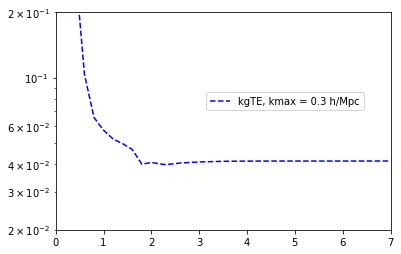

In [83]:
redshifts = binEdges[2:] 
print 'fsky: ',fsky,', fsky^(-1/2): ,',fsky**(-.5)

plt.semilogy(redshifts,np.array(sigmaBins2_02nw)[:,6]*fsky**(-.5)*1000,label='kgTE  opt, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
plt.semilogy(redshifts,np.array(sigmaBins4_02nw)[:,6]*fsky**(-.5)*1000,label='kgTE gold, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
plt.legend(loc=(0.45,0.85))
plt.xlim([0.2,7])
plt.ylim([.020*1000,0.150*1000])
plt.xlabel('redshift')
plt.ylabel(r'$\sigma(m_\nu)$ [meV]')
plt.title(r'$\sigma(m_\nu,z)$, $w$ fixed, $f_{{sky}} = {0}$'.format(fsky))
plt.show()


In [74]:
sigmaBins2_01,FoMPropBins2_01,paramList2_01 = getKZlimited(covarBins2_01,dClVecsBins2_01,
                                                           preMaskBins2_01,Fobj2,lmaxByBin2_01,FijTE2,
                                                           centers=centers)
sigmaBins2_02,FoMPropBins2_02,paramList2_02 = getKZlimited(covarBins2_02,dClVecsBins2_02,
                                                           preMaskBins2_02,Fobj2,lmaxByBin2_02,FijTE2,
                                                           centers=centers)

#sigmaBins4_01,FoMPropBins4_01,paramList4_01 = getKZlimited(covarBins4_01,dClVecsBins4_01,
#                                                           preMaskBins4_01,Fobj4,lmaxByBin4_01,FijTE4,
#                                                           centers=centers)
#sigmaBins4_02,FoMPropBins4_02,paramList4_02 = getKZlimited(covarBins4_02,dClVecsBins4_02,
#                                                           preMaskBins4_02,Fobj4,lmaxByBin4_02,FijTE4,
#                                                           centers=centers)

print 'done'

lmaxByBin:  [   2   85  161  230  290  343  391  433  472  506  537  579  616  658
  704  742 2000]

starting bin number  2 , with sigmaBins index =  0 , pmb[0] = [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4
  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8
  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11
 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[0]  with bin numbers [0 2]
  toCut:  [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
nBlocks:  1 , nBlocks2:  1
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape: 

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


  the cut preMask:  [0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
  starting block  2
  use 3 bin numbers from pmb[0]  with bin numbers [0 3 2]
  toCut:  [ 1  4  5  6  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
nBlocks:  2 , nBlocks2:  2
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (11, 11)
for clkk: lmin =  161 , lmax = , 2000
Fijkk.shape:  (9, 9)

starting bin number  4 , with sigmaBins index =  2 , pmb[2] = [ 0  4  5  6  7  8  9 10 11 12 13 14 15 16  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13 14 14 14 15 15 16]
  starting 

  the cut preMask:  [0 4 5 6 7 8 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6
 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8]
  starting block  6
  use 7 bin numbers from pmb[1]  with bin numbers [0 8 7 6 5 4 3]
  toCut:  [ 1  2  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 3 4 5 6 7 8 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8
 8 8]
  starting block  7
  use 8 bin numbers from pmb[0]  with bin numbers [0 8 7 6 5 4 3 2]
  toCut:  [ 1  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 3 4 5 6 7 8 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7
 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8]
nBlocks:  7 , nBlocks2:  7
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
origi

  the cut preMask:  [ 0  6  7  8  9 10 11  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7
  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10
 10 10 10 10 11 11 11 11 11 11]
  starting block  7
  use 8 bin numbers from pmb[3]  with bin numbers [ 0 11 10  9  8  7  6  5]
  toCut:  [ 1  2  3  4 12 13 14 15 16]
  the cut preMask:  [ 0  5  6  7  8  9 10 11  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6
  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8
  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11]
  starting block  8
  use 9 bin numbers from pmb[2]  with bin numbers [ 0 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 12 13 14 15 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5
  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7
  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 11 11 11 11 11 11]
  starting bloc

  starting block  8
  use 9 bin numbers from pmb[4]  with bin numbers [ 0 13 12 11 10  9  8  7  6]
  toCut:  [ 1  2  3  4  5 14 15 16]
  the cut preMask:  [ 0  6  7  8  9 10 11 12 13  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10
 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13]
  starting block  9
  use 10 bin numbers from pmb[3]  with bin numbers [ 0 13 12 11 10  9  8  7  6  5]
  toCut:  [ 1  2  3  4 14 15 16]
  the cut preMask:  [ 0  5  6  7  8  9 10 11 12 13  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8
  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11
 11 12 12 12 12 12 13 13 13 13]
  starting block  10
  use 11 bin numbers from pmb[2]  with bin numbers [ 0 13 12 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 14 15 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11 12 13  4  4  4  4  4  4  4  4  4  4  4  4 

  the cut preMask:  [ 0  6  7  8  9 10 11 12 13 14 15  6  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9
  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14
 14 14 15 15]
  starting block  11
  use 12 bin numbers from pmb[3]  with bin numbers [ 0 15 14 13 12 11 10  9  8  7  6  5]
  toCut:  [ 1  2  3  4 16]
  the cut preMask:  [ 0  5  6  7  8  9 10 11 12 13 14 15  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11
 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15]
  starting block  12
  use 13 bin numbers from pmb[2]  with bin numbers [ 0 15 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11 12 13 14 15  4  4  4  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6
  6  7  7  7  7

  the cut preMask:  [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
nBlocks:  1 , nBlocks2:  1
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (10, 10)
for clkk: lmin =  170 , lmax = , 2000
Fijkk.shape:  (9, 9)

starting bin number  3 , with sigmaBins index =  1 , pmb[1] = [ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[1]  with bin numbers [0 3]
  toCut:  [ 1  2  4  5  6  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 3 3 3 3 3 3 3 3 3 3 3 3 3 

  toCut:  [ 1  2  3  4  5  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 6 7 8 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8]
  starting block  4
  use 5 bin numbers from pmb[3]  with bin numbers [0 8 7 6 5]
  toCut:  [ 1  2  3  4  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 5 6 7 8 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7
 7 8 8 8 8 8 8 8 8 8]
  starting block  5
  use 6 bin numbers from pmb[2]  with bin numbers [0 8 7 6 5 4]
  toCut:  [ 1  2  3  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 4 5 6 7 8 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6
 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8]
  starting block  6
  use 7 bin numbers from pmb[1]  with bin numbers [0 8 7 6 5 4 3]
  toCut:  [ 1  2  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 3 4 5 6 7 8 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8
 8 8]
  starting block  7
  use 8 bin nu

  the cut preMask:  [ 0  7  8  9 10 11  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11]
  starting block  6
  use 7 bin numbers from pmb[4]  with bin numbers [ 0 11 10  9  8  7  6]
  toCut:  [ 1  2  3  4  5 12 13 14 15 16]
  the cut preMask:  [ 0  6  7  8  9 10 11  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7
  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10
 10 10 10 10 11 11 11 11 11 11]
  starting block  7
  use 8 bin numbers from pmb[3]  with bin numbers [ 0 11 10  9  8  7  6  5]
  toCut:  [ 1  2  3  4 12 13 14 15 16]
  the cut preMask:  [ 0  5  6  7  8  9 10 11  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6
  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8
  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11]
  starting block  8
  use 9 bin numbers from pmb[2]  with bin numbers [ 0 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 12 13 14 15 16]

  the cut preMask:  [ 0  6  7  8  9 10 11 12 13  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10
 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13]
  starting block  9
  use 10 bin numbers from pmb[3]  with bin numbers [ 0 13 12 11 10  9  8  7  6  5]
  toCut:  [ 1  2  3  4 14 15 16]
  the cut preMask:  [ 0  5  6  7  8  9 10 11 12 13  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8
  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11
 11 12 12 12 12 12 13 13 13 13]
  starting block  10
  use 11 bin numbers from pmb[2]  with bin numbers [ 0 13 12 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 14 15 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11 12 13  4  4  4  4  4  4  4  4  4  4  4  4  4
  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  

  the cut preMask:  [ 0  8  9 10 11 12 13 14 15  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13
 14 14 14 15 15]
  starting block  9
  use 10 bin numbers from pmb[5]  with bin numbers [ 0 15 14 13 12 11 10  9  8  7]
  toCut:  [ 1  2  3  4  5  6 16]
  the cut preMask:  [ 0  7  8  9 10 11 12 13 14 15  7  7  7  7  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11
 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15]
  starting block  10
  use 11 bin numbers from pmb[4]  with bin numbers [ 0 15 14 13 12 11 10  9  8  7  6]
  toCut:  [ 1  2  3  4  5 16]
  the cut preMask:  [ 0  6  7  8  9 10 11 12 13 14 15  6  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9
  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14
 14 14 15 15]
  starting block  11
  use 12 bin numbers from pmb[3]  with bin numbers [ 0

In [75]:
# now for galaxies only case
sigmaBins2_01g,FoMPropBins2_01g,paramList2_01g = getKZlimited(covarBins2_01g,dClVecsBins2_01g,
                                                           preMaskBins2_01g,Fobj2,lmaxByBin2_01g,FijTE2,
                                                           centers=centers,galaxiesOnly=True)
sigmaBins2_02g,FoMPropBins2_02g,paramList2_02g = getKZlimited(covarBins2_02g,dClVecsBins2_02g,
                                                           preMaskBins2_02g,Fobj2,lmaxByBin2_02g,FijTE2,
                                                           centers=centers,galaxiesOnly=True)

#sigmaBins4_01g,FoMPropBins4_01g,paramList4_01g = getKZlimited(covarBins4_01g,dClVecsBins4_01g,
#                                                           preMaskBins4_01g,Fobj4,lmaxByBin4_01g,FijTE4,
#                                                           centers=centers,galaxiesOnly=True)
#sigmaBins4_02g,FoMPropBins4_02g,paramList4_02g = getKZlimited(covarBins4_02g,dClVecsBins4_02g,
#                                                           preMaskBins4_02g,Fobj4,lmaxByBin4_02g,FijTE4,
#                                                           centers=centers,galaxiesOnly=True)

print 'done'

lmaxByBin:  [   2   85  161  230  290  343  391  433  472  506  537  579  616  658
  704  742 2000]

starting bin number  2 , with sigmaBins index =  0 , pmb[0] = [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[0]  with bin numbers [0 2]
  toCut:  [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
nBlocks:  1 , nBlocks2:  1
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (10, 10)

starting bi

  starting block  5
  use 6 bin numbers from pmb[2]  with bin numbers [0 8 7 6 5 4]
  toCut:  [ 1  2  3  9 10 11 12 13 14 15 16]
  the cut preMask:  [4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7
 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8]
  starting block  6
  use 7 bin numbers from pmb[1]  with bin numbers [0 8 7 6 5 4 3]
  toCut:  [ 1  2  9 10 11 12 13 14 15 16]
  the cut preMask:  [3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5
 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8]
  starting block  7
  use 8 bin numbers from pmb[0]  with bin numbers [0 8 7 6 5 4 3 2]
  toCut:  [ 1  9 10 11 12 13 14 15 16]
  the cut preMask:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7
 7 8 8 8 8 8 8 8 8 8]
nBlocks:  7 , nBlocks2:  7
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6

  the cut preMask:  [ 5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11]
  starting block  8
  use 9 bin numbers from pmb[2]  with bin numbers [ 0 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 12 13 14 15 16]
  the cut preMask:  [ 4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11]
  starting block  9
  use 10 bin numbers from pmb[1]  with bin numbers [ 0 11 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 12 13 14 15 16]
  the cut preMask:  [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10

  the cut preMask:  [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13]
  starting block  12
  use 13 bin numbers from pmb[0]  with bin numbers [ 0 13 12 11 10  9  8  7  6  5  4  3  2]
  toCut:  [ 1 14 15 16]
  the cut preMask:  [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13]
nBlocks:  12 , nBlocks2:  12
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 

  the cut preMask:  [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13 14 14 14 15 15]
  starting block  14
  use 15 bin numbers from pmb[0]  with bin numbers [ 0 15 14 13 12 11 10  9  8  7  6  5  4  3  2]
  toCut:  [ 1 16]
  the cut preMask:  [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15]
nBlocks:  14 , nBlocks2:  14
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' '

  the cut preMask:  [4 4 4 4 4 4 4 4 4 4 4 4 4]
  starting block  2
  use 3 bin numbers from pmb[1]  with bin numbers [0 4 3]
  toCut:  [ 1  2  5  6  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4]
  starting block  3
  use 4 bin numbers from pmb[0]  with bin numbers [0 4 3 2]
  toCut:  [ 1  5  6  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 4]
nBlocks:  3 , nBlocks2:  3
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (12, 12)

starting bin number  5 , with sigmaBins index =  3 , pmb[3] = [ 5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9 10 10 10 10 10 1

  the cut preMask:  [8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9]
  starting block  3
  use 4 bin numbers from pmb[5]  with bin numbers [0 9 8 7]
  toCut:  [ 1  2  3  4  5  6 10 11 12 13 14 15 16]
  the cut preMask:  [7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9]
  starting block  4
  use 5 bin numbers from pmb[4]  with bin numbers [0 9 8 7 6]
  toCut:  [ 1  2  3  4  5 10 11 12 13 14 15 16]
  the cut preMask:  [6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9
 9]
  starting block  5
  use 6 bin numbers from pmb[3]  with bin numbers [0 9 8 7 6 5]
  toCut:  [ 1  2  3  4 10 11 12 13 14 15 16]
  the cut preMask:  [5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8
 8 8 8 8 8 9 9 9 9 9 9 9 9]
  starting block  6
  use 7 bin numbers from pmb[2]  with bin numbers [0 9 8 7 6 5 4]
  toCut:  [ 1  2  3 10 11 12 13 14 15 16]
  the cut preMask:  [4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7
 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 

['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (19, 19)

starting bin number  12 , with sigmaBins index =  10 , pmb[10] = [12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[10]  with bin numbers [ 0 12]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 13 14 15 16]
  the cut preMask:  [12 12 12 12 12]
  starting block  2
  use 3 bin numbers from pmb[9]  with bin numbers [ 0 12 11]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 13 14 15 16]
  the cut preMask:  [11 11 11 11 11 11 12 12 12 12 12]
  starting block  3
  use 4 bin numbers from pmb[8]  with bin numbers [ 0 12 11 10]
  toCut:  [ 1  2  3  4  5  6  7  8  9 13 14 15 16]
  the cut preMask:  [10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12]
  starting block  4
  use 5 bin numbers from pmb[7]  with bin numb

  the cut preMask:  [ 7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13
 13 14 14 14]
  starting block  9
  use 10 bin numbers from pmb[4]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6]
  toCut:  [ 1  2  3  4  5 15 16]
  the cut preMask:  [ 6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11
 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14]
  starting block  10
  use 11 bin numbers from pmb[3]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5]
  toCut:  [ 1  2  3  4 15 16]
  the cut preMask:  [ 5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13
 14 14 14]
  starting block  11
  use 12 bin numbers from pmb[2]  with bin numbers [ 0 14 13 12

  starting block  11
  use 12 bin numbers from pmb[4]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6]
  toCut:  [1 2 3 4 5]
  the cut preMask:  [ 6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11
 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  12
  use 13 bin numbers from pmb[3]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5]
  toCut:  [1 2 3 4]
  the cut preMask:  [ 5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13
 14 14 14 15 15 16]
  starting block  13
  use 14 bin numbers from pmb[2]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [1 2 3]
  the cut preMask:  [ 4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6

In [76]:
# collect sigma_w0, sigma_wa for kmax1,kmax2 in nonlinear case. (drop linear for now)
nSigmas = sigmaBins2_01.__len__()
sigmas_w0_2_01 = []
sigmas_wa_2_01 = []
sigmas_w0_2_02 = []
sigmas_wa_2_02 = []
#w0Ind = 8
#waInd = 7
w0Ind = 7
waInd = 8
for sigNum in range(nSigmas):
    sigmas_w0_2_01.append(sigmaBins2_01[sigNum][w0Ind])
    sigmas_wa_2_01.append(sigmaBins2_01[sigNum][waInd])
    sigmas_w0_2_02.append(sigmaBins2_02[sigNum][w0Ind])
    sigmas_wa_2_02.append(sigmaBins2_02[sigNum][waInd])

In [77]:
# galaxies only case
nSigmas = sigmaBins2_01g.__len__()
sigmas_w0_2_01g = []
sigmas_wa_2_01g = []
sigmas_w0_2_02g = []
sigmas_wa_2_02g = []
#w0Ind = 8
#waInd = 7
w0Ind = 7
waInd = 8
for sigNum in range(nSigmas):
    sigmas_w0_2_01g.append(sigmaBins2_01g[sigNum][w0Ind])
    sigmas_wa_2_01g.append(sigmaBins2_01g[sigNum][waInd])
    sigmas_w0_2_02g.append(sigmaBins2_02g[sigNum][w0Ind])
    sigmas_wa_2_02g.append(sigmaBins2_02g[sigNum][waInd])

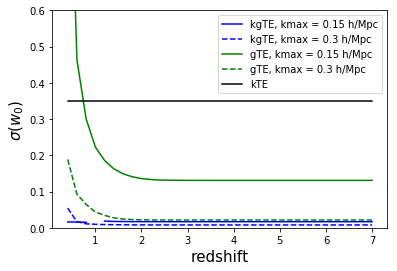

0.34864151962169704 0.016776202270539286 0.007834747238631456


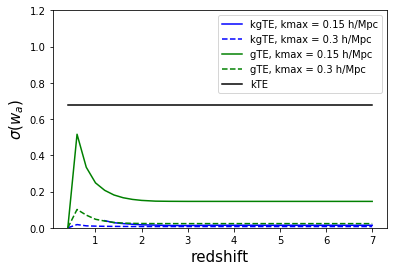

0.6787223990682951 0.014044408345064789 0.006814716120287396


In [78]:
# make the plots
#print nSigmas
doTE = True
#doTE = False
doGTE = True
#doGTE = False

h = hubble
if centers:
    redshifts = binEdges[1:] # top end of each bin
else:
    redshifts = binEdges[2:] # top end of each bin; bin1 not included
if doTE:
    plt.plot(redshifts,sigmas_w0_2_01,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h),color='b',linestyle='-')
    plt.plot(redshifts,sigmas_w0_2_02,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
    if doGTE:
        plt.plot(redshifts,sigmas_w0_2_01g,label='gTE, kmax = {0} h/Mpc'.format(kmax1/h),color='g',linestyle='-')
        plt.plot(redshifts,sigmas_w0_2_02g,label='gTE, kmax = {0} h/Mpc'.format(kmax2/h),color='g',linestyle='--')
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kTE2[w0Ind],label='kTE',color='k')
else:
    plt.plot(redshifts,sigmas_w0_2_01,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,sigmas_w0_2_02,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kk2[w0Ind],label='kk')
plt.legend()
plt.xlabel('redshift',fontsize=15)
plt.ylabel(r'$\sigma(w_0)$',fontsize=15)
plt.ylim([0,0.6])
plt.show()
if doTE:
    print sigmas_kTE2[w0Ind], sigmas_w0_2_01[-1], sigmas_w0_2_02[-1]
else:
    print sigmas_kk2[w0Ind], sigmas_w0_2_01[-1], sigmas_w0_2_02[-1]

if doTE:
    plt.plot(redshifts,sigmas_wa_2_01,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h),color='b',linestyle='-')
    plt.plot(redshifts,sigmas_wa_2_02,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
    if doGTE:
        plt.plot(redshifts,sigmas_wa_2_01g,label='gTE, kmax = {0} h/Mpc'.format(kmax1/h),color='g',linestyle='-')
        plt.plot(redshifts,sigmas_wa_2_02g,label='gTE, kmax = {0} h/Mpc'.format(kmax2/h),color='g',linestyle='--')
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kTE2[waInd],label='kTE',color='k')
else:
    plt.plot(redshifts,sigmas_wa_2_01,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,sigmas_wa_2_02,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kk2[waInd],label='kk')
plt.legend()
plt.xlabel('redshift',fontsize=15)
plt.ylabel(r'$\sigma(w_a)$',fontsize=15)
plt.ylim([0,1.2])
plt.show()
if doTE:
    print sigmas_kTE2[waInd], sigmas_wa_2_01[-1], sigmas_wa_2_02[-1]
else:
    print sigmas_kk2[waInd], sigmas_wa_2_01[-1], sigmas_wa_2_02[-1]

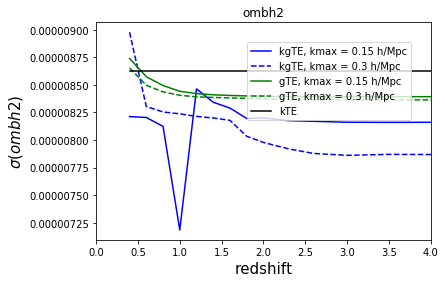

8.626446221636762e-06 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


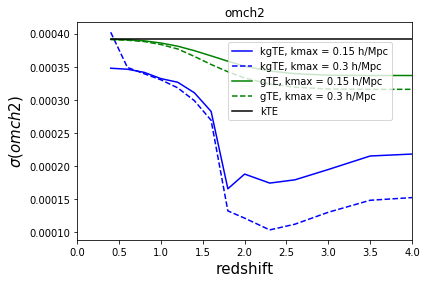

0.00039160352541471675 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


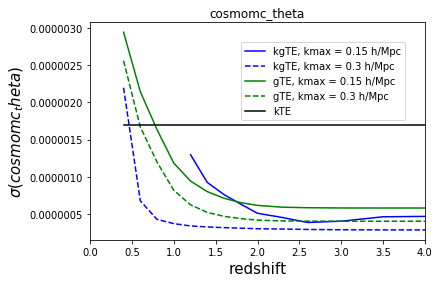

1.690521673617083e-06 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


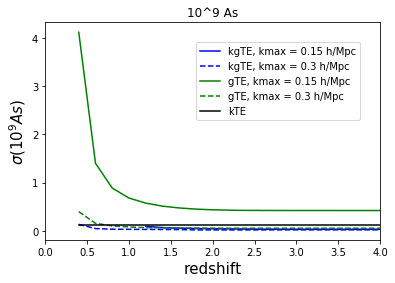

0.12865106709155769 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


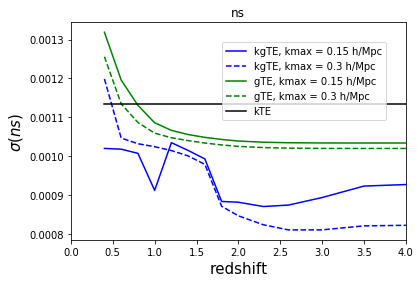

0.0011357443371141235 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


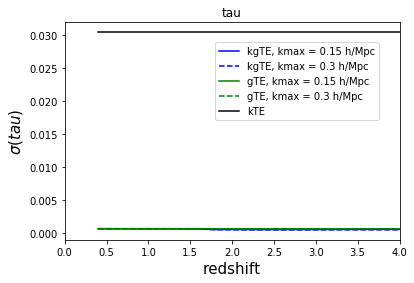

0.03041727459716841 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


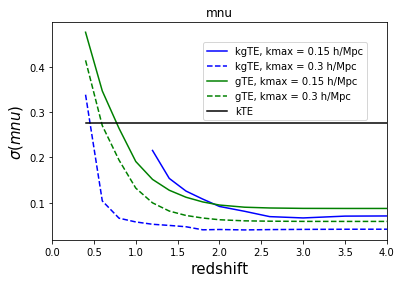

0.2751588154792966 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


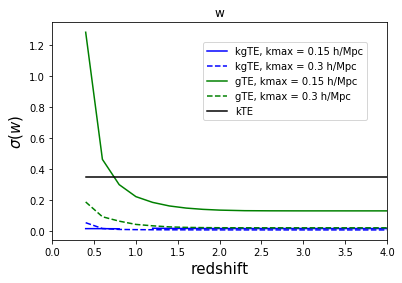

0.34864151962169704 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


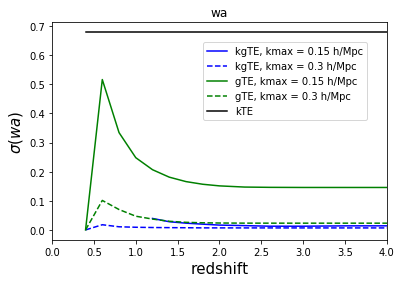

0.6787223990682951 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


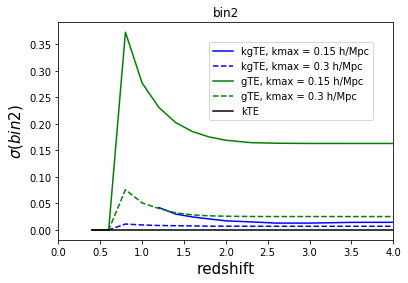

0.0 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


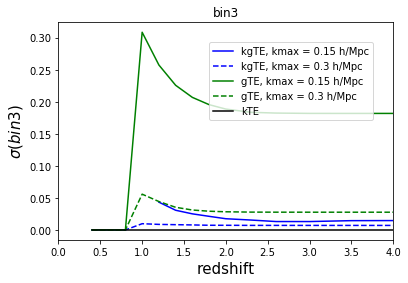

0.0 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


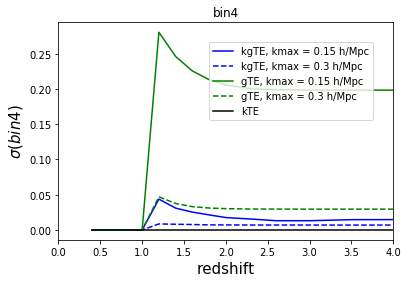

0.0 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


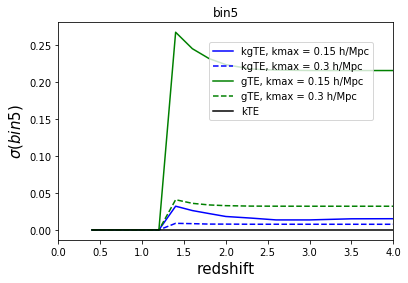

0.0 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


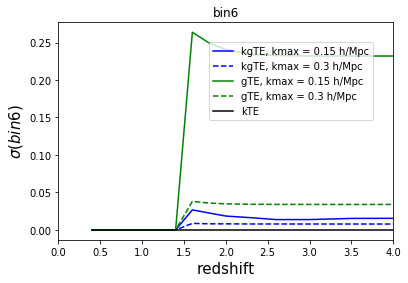

0.0 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


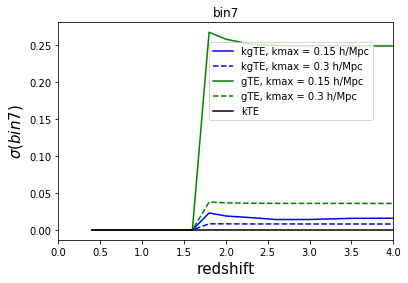

0.0 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


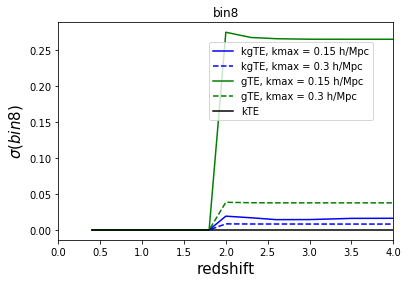

0.0 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


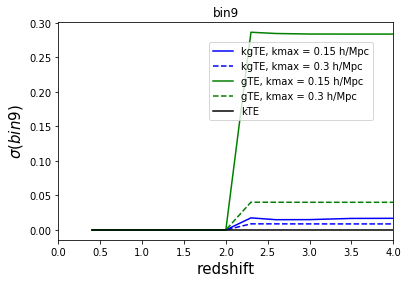

0.0 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


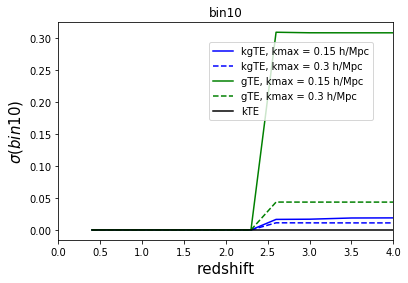

0.0 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


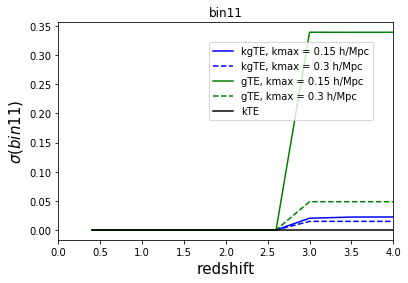

0.0 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


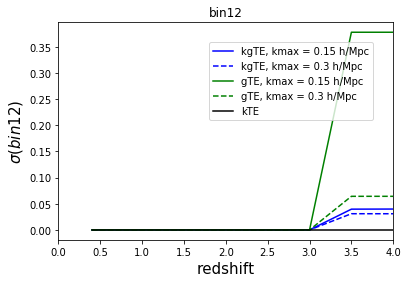

0.0 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


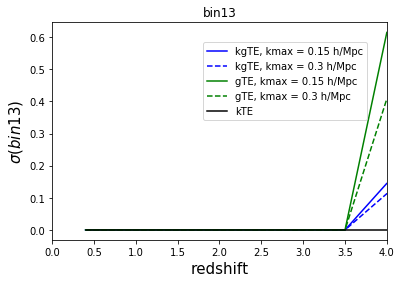

0.0 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


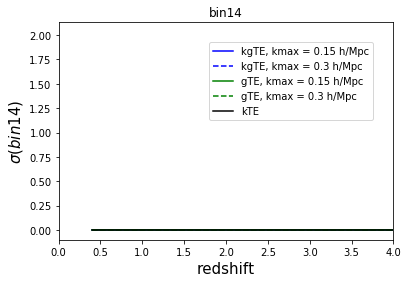

0.0 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


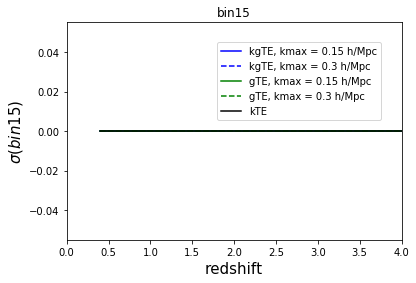

0.0 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


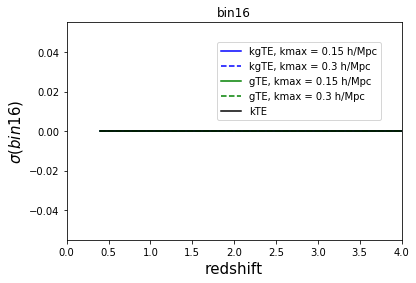

0.0 [8.16064269e-06 2.18720063e-04 4.66112828e-07 3.24534194e-02
 9.28368401e-04 5.35175905e-04 7.07067703e-02 1.67762023e-02
 1.40444083e-02 1.43623978e-02 1.46021929e-02 1.46647426e-02
 1.51579905e-02 1.55033321e-02 1.58327784e-02 1.62075024e-02
 1.68115391e-02 1.88701682e-02 2.22809846e-02 3.99165544e-02
 1.45146261e-01 3.43983945e-01 0.00000000e+00 0.00000000e+00] [7.87331192e-06 1.55235830e-04 2.83221184e-07 2.19770291e-02
 8.25996029e-04 4.70164099e-04 4.14379366e-02 7.83474724e-03
 6.81471612e-03 6.81503850e-03 7.01251995e-03 6.89179111e-03
 7.61468297e-03 7.85791852e-03 7.98656608e-03 8.13699638e-03
 8.66887380e-03 1.09812750e-02 1.46112752e-02 3.09230487e-02
 1.12978935e-01 2.66351074e-01 0.00000000e+00 0.00000000e+00]


In [79]:
# make the plots - all of the sigmas this time
if centers:
    redshifts = binEdges[1:] # top end of each bin
else:
    redshifts = binEdges[2:] # top end of each bin; bin1 not included
for sigmaNum, paramName in enumerate(paramList2_01):
    if doTE:
        plt.plot(redshifts,np.array(sigmaBins2_01)[:,sigmaNum],label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h),color='b',linestyle='-')
        plt.plot(redshifts,np.array(sigmaBins2_02)[:,sigmaNum],label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
        if doGTE:
            plt.plot(redshifts,np.array(sigmaBins2_01g)[:,sigmaNum],label='gTE, kmax = {0} h/Mpc'.format(kmax1/h),color='g',linestyle='-')
            plt.plot(redshifts,np.array(sigmaBins2_02g)[:,sigmaNum],label='gTE, kmax = {0} h/Mpc'.format(kmax2/h),color='g',linestyle='--')
        plt.plot(redshifts,np.ones(nSigmas)*sigmas_kTE2[sigmaNum],label='kTE',color='k')
    else:
        plt.plot(redshifts,np.array(sigmaBins2_01)[:,sigmaNum],label='kTE, kmax = {0} h/Mpc'.format(kmax1/h))
        plt.plot(redshifts,np.array(sigmaBins2_02)[:,sigmaNum],label='kTE, kmax = {0} h/Mpc'.format(kmax2/h))
        plt.plot(redshifts,np.ones(nSigmas)*sigmas_kk2[sigmaNum],label='kk')
    plt.legend()
    plt.xlabel('redshift',fontsize=15)
    plt.ylabel(r'$\sigma({0})$'.format(paramName),fontsize=15)
    plt.title(paramName)
    plt.legend(loc=(0.45,0.55))
    plt.xlim([0,4])
    #plt.ylim([.020,0.200])
    plt.show()
    if doTE:
        print sigmas_kTE2[sigmaNum], sigmaBins2_01[:][-1], sigmaBins2_02[:][-1]
    else:
        print 'kk: ',sigmas_kk2[sigmaNum],', kmax1:', sigmaBins2_01[-1,sigmaNum],', kmax2:', sigmaBins2_02[-1,sigmaNum]


In [80]:
print Fobj2.paramList

['ombh2', 'omch2', 'cosmomc_theta', '10^9 As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']


6.676489556793242


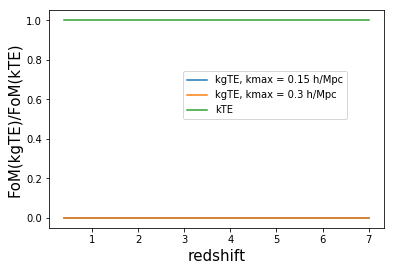

0.0 0.0


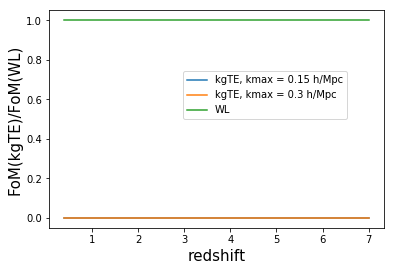

0.0 0.0


In [81]:
# figure of merit too!

FijInv = np.linalg.inv(Fij_kTE2)
#FoMProp_kTE2 = FoMprop(FijInv,iw0=8,iwa=7)
#FoMProp_kk = FoMprop(np.linalg.inv(Fij_kk2),iw0=8,iwa=7)
FoMProp_kTE2 = FoMprop(FijInv,iw0=7,iwa=8)
FoMProp_kk = FoMprop(np.linalg.inv(Fij_kk2),iw0=7,iwa=8)
if doTE:
    print FoMProp_kTE2

    plt.plot(redshifts,FoMPropBins2_01/FoMProp_kTE2,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02/FoMProp_kTE2,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='kTE')
    plt.ylabel('FoM(kgTE)/FoM(kTE)',fontsize=15)
else:
    print FoMProp_kk

    plt.plot(redshifts,FoMPropBins2_01/FoMProp_kk,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02/FoMProp_kk,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='k')
    plt.ylabel('FoM(kg)/FoM(k)',fontsize=15)
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.4,0.5))
plt.xlabel('redshift',fontsize=15)

#plt.ylim((0,0.1))
plt.show()
print FoMPropBins2_01[-1]/FoMProp_kTE2, FoMPropBins2_02[-1]/FoMProp_kTE2

#FoM prop from a paper: https://arxiv.org/pdf/astro-ph/0605696.pdf, figure 6
FoMProp_pap = 1/0.015

plt.plot(redshifts,FoMPropBins2_01/(np.ones(nSigmas)*FoMProp_pap),label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
plt.plot(redshifts,FoMPropBins2_02/(np.ones(nSigmas)*FoMProp_pap),label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
plt.plot(redshifts,np.ones(nSigmas),label='WL')
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.4,0.5))
plt.xlabel('redshift',fontsize=15)
plt.ylabel('FoM(kgTE)/FoM(WL)',fontsize=15)
#plt.ylim((0,0.0001))
plt.show()
print FoMPropBins2_01[-1]/FoMProp_pap, FoMPropBins2_02[-1]/FoMProp_pap

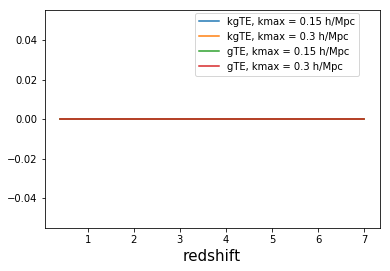

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in divide
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in divide
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


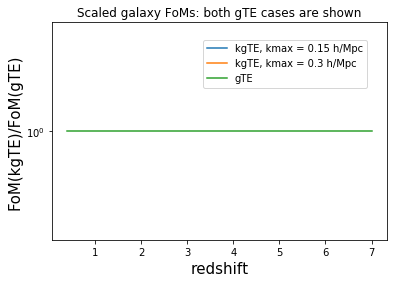

In [82]:
# now for the gTE

if doTE:
    plt.plot(redshifts,FoMPropBins2_01,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,FoMPropBins2_01g,label='gTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02g,label='gTE, kmax = {0} h/Mpc'.format(kmax2/h))
    
    #plt.plot(redshifts,FoMPropBins2_01/FoMPropBins2_01g,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    #plt.plot(redshifts,FoMPropBins2_02/FoMPropBins2_02g,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    #plt.plot(redshifts,np.ones(nSigmas),label='gTE')
    
    #plt.semilogy(redshifts,FoMPropBins2_01/FoMPropBins2_01g,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    #plt.semilogy(redshifts,FoMPropBins2_02/FoMPropBins2_02g,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    #plt.semilogy(redshifts,np.ones(nSigmas),label='gTE')
    
    #plt.ylabel('FoM(kgTE)/FoM(gTE)',fontsize=15)
    #plt.title('Scaled galaxy FoMs: both gTE cases are shown')
else:
    print FoMProp_kk

    plt.plot(redshifts,FoMPropBins2_01/FoMPropBins2_01g,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02/FoMPropBins2_02g,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='k')
    plt.ylabel('FoM(kg)/FoM(k)',fontsize=15)
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.45,0.7))
plt.xlabel('redshift',fontsize=15)
plt.show()

if doTE:
    #plt.plot(redshifts,FoMPropBins2_01,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    #plt.plot(redshifts,FoMPropBins2_02,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    #plt.plot(redshifts,FoMPropBins2_01g,label='gTE, kmax = {0} h/Mpc'.format(kmax1/h))
    #plt.plot(redshifts,FoMPropBins2_02g,label='gTE, kmax = {0} h/Mpc'.format(kmax2/h))
    
    #plt.plot(redshifts,FoMPropBins2_01/FoMPropBins2_01g,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    #plt.plot(redshifts,FoMPropBins2_02/FoMPropBins2_02g,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    #plt.plot(redshifts,np.ones(nSigmas),label='gTE')
    
    plt.semilogy(redshifts,FoMPropBins2_01/FoMPropBins2_01g,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.semilogy(redshifts,FoMPropBins2_02/FoMPropBins2_02g,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.semilogy(redshifts,np.ones(nSigmas),label='gTE')
    
    plt.ylabel('FoM(kgTE)/FoM(gTE)',fontsize=15)
    plt.title('Scaled galaxy FoMs: both gTE cases are shown')
else:
    print FoMProp_kk

    plt.plot(redshifts,FoMPropBins2_01/FoMPropBins2_01g,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02/FoMPropBins2_02g,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='k')
    plt.ylabel('FoM(kg)/FoM(k)',fontsize=15)
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.45,0.7))
plt.xlabel('redshift',fontsize=15)
plt.show()